In [1]:
import matplotlib.pyplot as plt
plt.style.use("nature_neurosci.mplstyle")


# Define colors
colors = {
    "Single": "#333333",
    "Left": "#246EB9",
    "Right": "#8B1E3F",
    "Ipsilateral": "#1B9E77",
    "Contralateral": "#D95F02",
    "Within": "#2B4162",
    "Across": "#E89D0B"
}

from matplotlib.colors import LinearSegmentedColormap
left_right_cmap = LinearSegmentedColormap.from_list("LeftRight",\
                                                     [colors['Left'], "white", colors['Right']])
ipsi_contra_cmap = LinearSegmentedColormap.from_list("IpsiContra",\
                                                     [colors['Ipsilateral'], "white", colors['Contralateral']])

In [2]:
## circstats
def len2(x):
	if type(x) is not type([]):
		if type(x) is not type(array([])):
			return -1
	return len(x)

def phase2(x):
	if not np.isnan(x):
		return phase(x)
	return nan
    
def circdist(angles1,angles2):
    ''' calculates circular distance of angles [rad]'''
    if len2(angles2) < 0:
        if len2(angles1) > 0:
            angles2 = [angles2]*len(angles1)
        else:
            angles2 = [angles2]
            angles1 = [angles1]
        if len2(angles1) < 0:
            angles1 = [angles1]*len(angles2)
    return array(list(map(lambda a1,a2: phase2(np.exp(1j*a1)/np.exp(1j*a2)), angles1,angles2)))

In [3]:
def sig_bar(sigs,axis,y,ax,color):
	w=np.diff(axis)[0]
	for s in sigs:
		beg =axis[s]-w/2
		end = axis[s]+w/2
		ax.fill_between([beg,end],[y[0],y[0]],[y[1],y[1]],color=color)

In [4]:
def sign_rl(rel_loc):
    # returns sign of array unless value=0, returns 1
    sign = [np.sign(rel_loc[rl]) if rel_loc[rl]!=0.0 else 1 for rl in range(len(rel_loc))]
    return np.array(sign)

In [5]:
def custom_format(y, _):
    if (y.is_integer()) | (round(y, 1) == y):
        return f'{y:.1f}'  # No decimal point for integers
    else:
        return f'{y:.2g}'

In [6]:
import numpy as np
def plot_twolines_full(R=[],base=[], bins=0.2,labelR='',labelB='', errorbars='SEM', MeanType = np.nanmean,\
                                 borders=[], ylabel='decoding', yticks = False, titel='', significances=False,\
                       currentTrial=False, end_border = 15, shorten_delay = 0, ylim=False,\
                       refline =0, colors=[colors['Within'], colors['Across']]):
   
    offset_start = borders[1]-borders[0]
    x = (np.linspace(borders[1], borders[5]-shorten_delay, borders[5]-borders[1]-shorten_delay)-\
         (borders[2]-borders[1])-offset_start)*bins
    x3 = (np.linspace(borders[5]+shorten_delay, borders[8], borders[8]-borders[5]+1-shorten_delay)-\
          (borders[7]-borders[1])-offset_start)*bins
    if end_border < 8:# need end of one trial, start of next trial
        x3 = (np.linspace(borders[5]+shorten_delay, borders[end_border], borders[end_border]-borders[5]-shorten_delay)-\
              (borders[7]-borders[1])-offset_start)*bins
    
    width_radius = [len(x), len(x3)]
    # only add 3rd axis if we look at start of next trial
    if end_border > 12:
        end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-\
                    (borders[13]-borders[1])-offset_start)*bins
        start_curr = (np.linspace(borders[12], borders[end_border], borders[end_border]-borders[12])-\
                      (borders[13]-borders[1])-offset_start)*bins
        x5 = np.append(end_prev,start_curr)
        width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    elif end_border >=10:
        end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-offset_start)*bins
        x5 = end_prev
        width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    
    compare = 0.05#/len(np.append(np.append(x,x2),x5))     
    # TTESTS:
    pvals = ttest_rel(R,base, axis=0, nan_policy='omit')[1]
    pvals1 = ttest_1samp(R, 0, axis=0, nan_policy='omit')[1]
    pvals2 = ttest_1samp(base, 0, axis=0, nan_policy='omit')[1]
    
    # compute mean and errorbars
    mean_R = MeanType(R, axis=0)
    mean_base = MeanType(base, axis=0)
    if MeanType == circmean:
        mean_R = MeanType(R, axis=0, low=-np.pi, high=np.pi)
        mean_base = MeanType(base, axis=0, low=-np.pi, high=np.pi)
    if errorbars=='CI':
        std_R = 2*sem(R, axis=0, nan_policy='omit')
        std_base = 2*sem(base, axis=0, nan_policy='omit')
    else:
        std_R = sem(R, axis=0, nan_policy='omit')
        std_base = sem(base, axis=0, nan_policy='omit')
    
    #f, (ax1,ax5) = plt.subplots(1, 2,sharey=True,figsize=(3.8,1.6), gridspec_kw={'width_ratios': width_radius})
    #f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(16,5), gridspec_kw={'width_ratios': width_radius})
    if end_border < 10:
        f, (ax1,ax3) = plt.subplots(1, 2,sharey=True,figsize=(2.7,2), gridspec_kw={'width_ratios': width_radius})
    else:
        f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(3.5, 2), gridspec_kw={'width_ratios': width_radius})
    
    ###################### PLOT FIXTION TO DELAY PREVIOUS
    cut = range(borders[1], borders[5]-shorten_delay)
    # within
    ax1.plot(x,mean_R[cut], color=colors[0], label=labelR)#+', '+errorbars
    ax1.fill_between(x, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.3)
    # across 
    ax1.plot(x,mean_base[cut], color=colors[1], label=labelB)#+', '+errorbars
    ax1.fill_between(x, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]),\
                     color=colors[1], alpha=0.3)
    if currentTrial:
        ax1.set_xlabel('fix$_{n+1}$', labelpad=0)
    else:
        ax1.set_xlabel('fix$_{n}$', labelpad=0)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
    ax1.set_ylabel(ylabel)
    if yticks != False:
        ax1.set_yticks(yticks)
    if (len(np.unique(base)) != 1):
        ax1.legend()
    if ylim!=False:
        ax1.set_ylim(ylim)
    
    ###################### PLOT DELAY TO SACCADE PREVIOUS
    cut = range(borders[5]+shorten_delay, borders[8]+1)
    if end_border < 8:
        cut = range(borders[5]+shorten_delay, borders[end_border])
    # within
    ax3.plot(x3,mean_R[cut], color=colors[0], label=labelR)
    ax3.fill_between(x3, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.3)
    # across 
    ax3.plot(x3,mean_base[cut], color=colors[1], label=labelB)
    ax3.fill_between(x3, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]), color=colors[1], alpha=0.3)
    if currentTrial:
        ax3.set_xlabel('response$_{n+1}$', labelpad=0)
    else:
        ax3.set_xlabel('response$_{n}$', labelpad=0)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
    #ax3.set_ylabel(ylabel)
    #ax3.set_yticks([0,0.1])
       
    ###################### PLOT ITI PREVIOUS TO DELAY CURRENT TRIAL
    if end_border >= 10:
        pc_base = mean_base[borders[9]:borders[10]+1]
        pcstd_base = std_base[borders[9]:borders[10]+1]
        pc_R = mean_R[borders[9]:borders[10]+1]
        pcstd_R = std_R[borders[9]:borders[10]+1]
        if end_border > 12:
            pc_base = np.append(mean_base[borders[9]:borders[10]+1],mean_base[borders[12]:borders[15]])
            pcstd_base = np.append(std_base[borders[9]:borders[10]+1],std_base[borders[12]:borders[15]])
            pc_R = np.append(mean_R[borders[9]:borders[10]+1],mean_R[borders[12]:borders[15]])
            pcstd_R = np.append(std_R[borders[9]:borders[10]+1],std_R[borders[12]:borders[15]])    

        # plot reactivaton period
        # within
        ax5.plot(x5,pc_R, color=colors[0])
        ax5.fill_between(x5, pc_R-np.array(pcstd_R), pc_R+np.array(pcstd_R), color=colors[0], alpha=0.3)
        # across
        ax5.plot(x5,pc_base, color=colors[1])
        ax5.fill_between(x5, pc_base-np.array(pcstd_base), pc_base+np.array(pcstd_base), color=colors[1], alpha=0.3)
        # plot baseline
        ax5.set_xlabel('fix$_{n+1}$', labelpad=0)
        #ax5.set_xticks([])
        ax5.spines['right'].set_visible(False)
        ax5.spines['left'].set_visible(False)
        ax5.spines['top'].set_visible(False)
        ax5.xaxis.set_ticks_position('bottom')
        ax5.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
        y0=ax5.get_ylim()[0]
        y1=ax5.get_ylim()[1]
        ax5.fill_between([(borders[14]-borders[12])*bins, (borders[15]-borders[12])*bins],\
                         y0, y1, color='grey', alpha=0.2)

    ###################### MARK IMPORTANT TIME PERIODS    
    f.text(0.55, 0.02, 'time (s) from', ha='center', fontsize=8)
#     # # plot significances
    y0=ax3.get_ylim()[0]
    y1=ax3.get_ylim()[1]
    off = (y1-y0)/10
    marker=250
    ax1.fill_between([(borders[3]-borders[2])*bins, (borders[4]-borders[2])*bins], y0, y1, color='grey', alpha=0.2)

    w = (y1-y0)/50
    off = [y1-w, y1]
    sigs = np.where(pvals[borders[1]:borders[5]-shorten_delay]<compare)[0]
    sig_bar(sigs,x,off,ax1,'#333333')
    sigs = np.where(pvals[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
    sig_bar(sigs,x3,off,ax3,'#333333')
    if end_border >= 10:
        sigs = np.where(pvals[borders[9]:borders[10]+1]<compare)[0]
        sig_bar(sigs,x5,off,ax5,'#333333')
        f.text(0.23, 0.87, 'Stim$_{n}$', ha='center', fontsize=8)
        f.text(0.46, 0.87, 'Delay$_{n}$', ha='center', fontsize=8)
        f.text(0.85, 0.87, 'ITI$_{n}$', ha='center', fontsize=8)
    elif end_border > 12:
        sigs = np.where(np.append(pvals[borders[9]:borders[10]+1],pvals[borders[12]:borders[15]])<compare)[0]
        sig_bar(sigs,x5,off,ax5,'#333333')
        f.text(0.94, 0.87, 'Stim$_{n+1}$', ha='center', fontsize=8)
    else:
        f.text(0.29, 0.87, 'Stim$_{n}$', ha='center', fontsize=8)
        f.text(0.63, 0.87, 'Delay$_{n}$', ha='center', fontsize=8)
        
    if significances:
        # within area
        off = [y1-2.5*w, y1-1.5*w]
        sigs = np.where(pvals1[borders[1]:borders[5]-shorten_delay]<compare)[0]
        sig_bar(sigs,x,off,ax1,colors[0])
        sigs = np.where(pvals1[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
        sig_bar(sigs,x3,off,ax3,colors[0])
        if end_border >= 10:
            sigs = np.where(pvals1[borders[9]:borders[10]+1]<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[0])
        elif end_border > 12:
            sigs = np.where(np.append(pvals1[borders[9]:borders[10]+1],pvals1[borders[12]:borders[15]])<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[0])
            
        # across areas
        off = [y1-4*w, y1-3*w]
        sigs = np.where(pvals2[borders[1]:borders[5]-shorten_delay]<compare)[0]
        sig_bar(sigs,x,off,ax1,colors[1])
        sigs = np.where(pvals2[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
        sig_bar(sigs,x3,off,ax3,colors[1])
        if end_border >= 10:
            sigs = np.where(pvals2[borders[9]:borders[10]+1]<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[1])
        elif end_border > 12:
            sigs = np.where(np.append(pvals2[borders[9]:borders[10]+1],pvals2[borders[12]:borders[15]])<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[1])
        

    plt.suptitle(titel)

    return

In [7]:
import numpy as np
def plot_threelines_full(R=[],base=[],base2=[], bins=200,labelR='',labelB='',labelB2='',\
                         errorbars='SEM', MeanType = np.nanmean,\
                                 borders=[], ylabel='decoding', yticks = False, ylim=False,\
                         titel='', significances=False,\
                       currentTrial=False, end_border = 15, shorten_delay = 0,\
                         refline =0, colors=['darkorange', 'darkgreen']):
   
    offset_start = borders[1]-borders[0]
    x = (np.linspace(borders[1], borders[5]-shorten_delay, borders[5]-borders[1]-shorten_delay)-\
         (borders[2]-borders[1])-offset_start)*bins
    x3 = (np.linspace(borders[5]+shorten_delay, borders[8], borders[8]-borders[5]+1-shorten_delay)-\
          (borders[7]-borders[1])-offset_start)*bins
    if end_border < 8:# need end of one trial, start of next trial
        x3 = (np.linspace(borders[5]+shorten_delay, borders[end_border], borders[end_border]-borders[5]-shorten_delay)-\
              (borders[7]-borders[1])-offset_start)*bins
    
    width_radius = [len(x), len(x3)]
    # only add 3rd axis if we look at start of next trial
    if end_border > 12:
        end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-\
                    (borders[13]-borders[1])-offset_start)*bins
        start_curr = (np.linspace(borders[12], borders[end_border], borders[end_border]-borders[12])-\
                      (borders[13]-borders[1])-offset_start)*bins
        x5 = np.append(end_prev,start_curr)
        width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    elif end_border >=10:
        end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-offset_start)*bins
        x5 = end_prev
        width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    
    compare = 0.05#/len(np.append(np.append(x,x2),x5))     
    # TTESTS:
    pvals = ttest_1samp(R, 0, axis=0, nan_policy='omit')[1]
    pvals1 = ttest_1samp(base, 0, axis=0, nan_policy='omit')[1]
    pvals2 = ttest_1samp(base2, 0, axis=0, nan_policy='omit')[1]
    
    # compute mean and errorbars
    mean_R = MeanType(R, axis=0)
    mean_base = MeanType(base, axis=0)
    mean_base2 = MeanType(base2, axis=0)
    if MeanType == circmean:
        mean_R = MeanType(R, axis=0, low=-np.pi, high=np.pi)
        mean_base = MeanType(base, axis=0, low=-np.pi, high=np.pi)
        mean_base2 = MeanType(base2, axis=0, low=-np.pi, high=np.pi)
    if errorbars=='CI':
        std_R = 2*sem(R, axis=0, nan_policy='omit')
        std_base = 2*sem(base, axis=0, nan_policy='omit')
        std_base2 = 2*sem(base2, axis=0, nan_policy='omit')
    else:
        std_R = sem(R, axis=0, nan_policy='omit')
        std_base = sem(base, axis=0, nan_policy='omit')
        std_base2 = sem(base2, axis=0, nan_policy='omit')

        
    if end_border < 10:
        f, (ax1,ax3) = plt.subplots(1, 2,sharey=True,figsize=(3.8,2.1), gridspec_kw={'width_ratios': width_radius})
    else:
        f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(4.3, 2.1), gridspec_kw={'width_ratios': width_radius})
    
    ###################### PLOT FIXTION TO DELAY PREVIOUS
    cut = range(borders[1], borders[5]-shorten_delay)
    # within
    ax1.plot(x,mean_R[cut], color=colors[0], label=labelR)#+', '+errorbars
    ax1.fill_between(x, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.3)
    # across 
    ax1.plot(x,mean_base[cut], color=colors[1], label=labelB)#+', '+errorbars
    ax1.fill_between(x, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]),\
                     color=colors[1], alpha=0.3)
    # across2 
    ax1.plot(x,mean_base2[cut], color=colors[2], label=labelB2)#+', '+errorbars
    ax1.fill_between(x, mean_base2[cut]-np.array(std_base2[cut]), mean_base2[cut]+np.array(std_base2[cut]),\
                     color=colors[2], alpha=0.3)
    if currentTrial:
        ax1.set_xlabel('fix$_{n+1}$', labelpad=0)
    else:
        ax1.set_xlabel('fix$_{n}$', labelpad=0)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
    ax1.set_ylabel(ylabel)
    if (len(np.unique(base)) != 1):
        ax1.legend()
    if ylim!=False:
        ax1.set_ylim(ylim)
    
    ###################### PLOT DELAY TO SACCADE PREVIOUS
    cut = range(borders[5]+shorten_delay, borders[8]+1)
    if end_border < 8:
        cut = range(borders[5]+shorten_delay, borders[end_border])
    # within
    ax3.plot(x3,mean_R[cut], color=colors[0], label=labelR)
    ax3.fill_between(x3, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.3)
    # across 
    ax3.plot(x3,mean_base[cut], color=colors[1], label=labelB)
    ax3.fill_between(x3, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]), color=colors[1], alpha=0.3)
    # across2 
    ax3.plot(x3,mean_base2[cut], color=colors[2], label=labelB2)
    ax3.fill_between(x3, mean_base2[cut]-np.array(std_base2[cut]), mean_base2[cut]+np.array(std_base2[cut]),\
                     color=colors[2], alpha=0.3)
    if currentTrial:
        ax3.set_xlabel('response$_{n+1}$', labelpad=0)
    else:
        ax3.set_xlabel('response$_{n}$', labelpad=0)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.axhline(refline, color='#333333', linestyle='--', alpha=0.7)

       
    ###################### PLOT ITI PREVIOUS TO DELAY CURRENT TRIAL
    if end_border >= 10:
        pc_R = mean_R[borders[9]:borders[10]+1]
        pcstd_R = std_R[borders[9]:borders[10]+1]
        pc_base = mean_base[borders[9]:borders[10]+1]
        pcstd_base = std_base[borders[9]:borders[10]+1]
        pc_base2 = mean_base2[borders[9]:borders[10]+1]
        pcstd_base2 = std_base2[borders[9]:borders[10]+1]
        if end_border > 12:
            pc_R = np.append(mean_R[borders[9]:borders[10]+1],mean_R[borders[12]:borders[15]])
            pcstd_R = np.append(std_R[borders[9]:borders[10]+1],std_R[borders[12]:borders[15]])   
            pc_base = np.append(mean_base[borders[9]:borders[10]+1],mean_base[borders[12]:borders[15]])
            pcstd_base = np.append(std_base[borders[9]:borders[10]+1],std_base[borders[12]:borders[15]])
            pc_base2 = np.append(mean_base2[borders[9]:borders[10]+1],mean_base2[borders[12]:borders[15]])
            pcstd_base2 = np.append(std_base2[borders[9]:borders[10]+1],std_base2[borders[12]:borders[15]])

        # plot reactivaton period
        # within
        ax5.plot(x5,pc_R, color=colors[0])
        ax5.fill_between(x5, pc_R-np.array(pcstd_R), pc_R+np.array(pcstd_R), color=colors[0], alpha=0.3)
        # across
        ax5.plot(x5,pc_base, color=colors[1])
        ax5.fill_between(x5, pc_base-np.array(pcstd_base), pc_base+np.array(pcstd_base), color=colors[1], alpha=0.3)
        # across2
        ax5.plot(x5,pc_base2, color=colors[2])
        ax5.fill_between(x5, pc_base2-np.array(pcstd_base2), pc_base2+np.array(pcstd_base2), color=colors[2], alpha=0.3)
        # plot baseline
        ax5.set_xlabel('fix$_{n+1}$', labelpad=0)
        #ax5.set_xticks([])
        ax5.spines['right'].set_visible(False)
        ax5.spines['left'].set_visible(False)
        ax5.spines['top'].set_visible(False)
        ax5.xaxis.set_ticks_position('bottom')
        ax5.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
        y0=ax5.get_ylim()[0]
        y1=ax5.get_ylim()[1]
        ax5.fill_between([(borders[14]-borders[12])*bins, (borders[15]-borders[12])*bins],\
                         y0, y1, color='grey', alpha=0.2)

    ###################### MARK IMPORTANT TIME PERIODS    
    f.text(0.55, -0., 'time (ms) from', ha='center', fontsize=12)
#     # # plot significances
    y0=ax3.get_ylim()[0]
    y1=ax3.get_ylim()[1]
    off = (y1-y0)/10
    marker=250
    ax1.fill_between([(borders[3]-borders[2])*bins, (borders[4]-borders[2])*bins], y0, y1, color='grey', alpha=0.2)

    w = (y1-y0)/30
    off = [y1, y1+w]
    sigs = np.where(pvals[borders[1]:borders[5]-shorten_delay]<compare)[0]
    sig_bar(sigs,x,off,ax1,colors[0])
    sigs = np.where(pvals[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
    sig_bar(sigs,x3,off,ax3,colors[0])
    if end_border >= 10:
        sigs = np.where(pvals[borders[9]:borders[10]+1]<compare)[0]
        sig_bar(sigs,x5,off,ax5,colors[0])
        f.text(0.23, 0.85, 'Stim$_{n}$', ha='center', fontsize=10)
        f.text(0.46, 0.85, 'Delay$_{n}$', ha='center', fontsize=10)
        f.text(0.85, 0.85, 'ITI$_{n}$', ha='center', fontsize=10)
    elif end_border > 12:
        sigs = np.where(np.append(pvals[borders[9]:borders[10]+1],pvals[borders[12]:borders[15]])<compare)[0]
        sig_bar(sigs,x5,off,ax5,colors[0])
        f.text(0.94, 0.85, 'Stim$_{n+1}$', ha='center', fontsize=10)
    else:
        f.text(0.29, 0.85, 'Stim$_{n}$', ha='center', fontsize=10)
        f.text(0.63, 0.85, 'Delay$_{n}$', ha='center', fontsize=10)
        
    if significances:
        # base1
        off = [y1-1.5*w, y1-0.5*w]
        sigs = np.where(pvals1[borders[1]:borders[5]-shorten_delay]<compare)[0]
        sig_bar(sigs,x,off,ax1,colors[1])
        sigs = np.where(pvals1[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
        sig_bar(sigs,x3,off,ax3,colors[1])
        if end_border >= 10:
            sigs = np.where(pvals1[borders[9]:borders[10]+1]<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[1])
        elif end_border > 12:
            sigs = np.where(np.append(pvals1[borders[9]:borders[10]+1],pvals1[borders[12]:borders[15]])<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[1])
            
        # base2
        off = [y1-3*w, y1-2*w]
        sigs = np.where(pvals2[borders[1]:borders[5]-shorten_delay]<compare)[0]
        sig_bar(sigs,x,off,ax1,colors[2])
        sigs = np.where(pvals2[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
        sig_bar(sigs,x3,off,ax3,colors[2])
        if end_border >= 10:
            sigs = np.where(pvals2[borders[9]:borders[10]+1]<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[2])
        elif end_border > 12:
            sigs = np.where(np.append(pvals2[borders[9]:borders[10]+1],pvals2[borders[12]:borders[15]])<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[2])
        
    # Apply the custom formatter to the y-axis
    ax1.yaxis.set_major_formatter(FuncFormatter(custom_format))
    if yticks != False:
        ax1.set_yticks(yticks)
    plt.suptitle(titel)

    return

# LOAD DATA

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.io import loadmat
from scipy.stats import *
from scipy.optimize import curve_fit
from cmath import phase
from numpy import array
from scipy.sparse import csr_matrix
import urllib
import pickle
from scipy.io import loadmat
import glob
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from pymicro.view.vol_utils import compute_affine_transform
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import statsmodels.formula.api as sf
from sklearn import metrics
from random import randint
from numpy.linalg import inv
import math
import io
#import h5py
from circ_stats import *
from patsy import dmatrices
import statsmodels.api as sm
import helpers as hf
import statsmodels.formula.api as smf
import copy
import matplotlib.ticker as ticker
from pingouin import circ_corrcc


monkeys=['Sa', 'Pe', 'Wa']

with open('./Results/df_serial.pickle', 'rb') as handle:
    df_sb = pickle.load(handle)
df_sb = df_sb.reset_index()
df_sb.rel_loc = np.round(df_sb.rel_loc,3)

    
#df_behav = df_behav.loc[(df_behav.monkey=='Sa') | (df_behav.monkey=='Wa')].reset_index(drop=True)
df_sb['session_continuous'] = [df_sb.monkey[i]+str(df_sb.session[i]) for i in df_sb.index]

same_id = 1
opp_id = 0
border_id = 2

# colors for accuracy plots
cmap_ACC = matplotlib.cm.get_cmap('summer_r')
colors_ACC = [cmap_ACC(0.1+i/(3+1)) for i in range(3)]

# colors for delay dependence plots
cmap_delay = matplotlib.cm.get_cmap('binary_r')
colors_delay = [cmap_delay(i/(4+0.1)) for i in range(4)]

# colors for serial dependence plots
cmap_SD = matplotlib.cm.get_cmap('Oranges_r')
colors_SD = [cmap_SD(0.1+i/(3+1)) for i in range(3)]

cmap = matplotlib.cm.get_cmap('binary_r')
colors_mono_bw = [cmap((m+1)/3.8) for m in range(3)]

# colors for same vs opposite hemisphere
colors_so = {'within': 'darkgreen', 'across': 'darkorange'}

cmap = matplotlib.cm.get_cmap('PiYG')
color1=cmap(230)#'#751A5D'#'#873145'
color2=cmap(40)#'#0C7C59'#'#2A7979'
colors_ic={'ipsi':color2, 'contra':color1}

# DEFINE DOG FIT PARAMETERS FOR EACH ANIMAL (based on BIC, questionable for Pe, Wa (delta BIC <2)
sigma={'Sa':0.9, 'Pe':2.15, 'Wa':0.45}
neural_sigma = {'Sa': 1.35, 'Pe': 3.0, 'Wa': 1.75}#
reactivation_sigma={'Sa':2.6, 'Pe':1.45, 'Wa':1.35}

/home/melanie/anaconda3/envs/brian2/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [9]:
def cut_task_timings(timecourse=[], timeperiods=np.array([]), max_time=np.nan):
    """
    Cuts the variable timecourse together based on the varying task timing in multiple sessions.
    Aligns to shortest session timing
    
    timecourse : np.array() of shape (sessions x trials x time)
    timeperiods: np.array() of shape (sessions x time)
    
    cut_array: np.array() of shape (sessions x trials x minimum_time)
    """
        
    # find minimum taskperiod onsets / durations across sessions
    
    min_duration = np.min(np.diff(timeperiods),axis=0)
    min_onset = np.append(0,np.cumsum(min_duration))#add one more 0 at start so borders and diff add up


    # if no end time is given, do for all timesteps
    if np.isnan(max_time):
        max_time = timeperiods.shape[-1]
    
    # cut sessions together
#     cut_array = np.array([np.concatenate([timecourse[sess][timing:timing+min_duration[idx]]\
#                                         if idx not in [5, 9, 16, 20]\
#                                  else timecourse[sess][timing-min_duration[idx]:timing]
#                                         for idx,timing in enumerate(timeperiods[sess][:max_time])])\
#                                         for sess in range(len(timecourse))])
    cut_array = np.array([np.concatenate([timecourse[sess][timing:timing+min_duration[idx]]\
                                        if idx not in [5, 9, 16, 20]\
                                 else timecourse[sess][timeperiods[sess][idx+1]-min_duration[idx]:timeperiods[sess][idx+1]]
                                        for idx,timing in enumerate(timeperiods[sess][:max_time])])\
                                        for sess in range(len(timecourse))])

    
    #cut_array = np.array([cut_array])
    
    return cut_array, min_onset

----

# Single trial analyses

In [10]:
def abs_err(prediction, all_targets):
    return np.abs([circdist(prediction, targ) for targ in all_targets])


df_behav = df_sb.copy()
#df_behav = df_behav.loc[(df_behav.monkey=='Sa') | (df_behav.monkey=='Wa')].reset_index(drop=True)
df_behav['session_continuous'] = df_behav['monkey']+df_behav['session'].astype(str)
# drop session with shorter stimulus
df_behav.drop(index = np.where(df_behav.session_continuous == 'Pe2')[0], inplace=True)
df_behav.reset_index(drop=True, inplace=True)


# LOAD NEURAL DECODER DATA
with open('./Results/SingleTrialDecoder.pickle', 'rb') as handle:
    df = pickle.load(handle)

df['session_continuous'] = df['monkey']+df['session'].astype(str)

bins=200/1000

# compute errors and shuffles
for neuron_type in ['combined', 'left', 'right']:
    print('Computing neuron_type: '+neuron_type)
    pred_prev=[]
    pred_prevortho=[]
    pred_curr=[]
    basecorr_prev=[]
    basecorr_prevortho=[]
    basecorr_curr=[]
    for i in df.index:
        targ_prev = np.round(np.angle(df.loc[i, 'targ_prev_xy']),3)
        targ_curr = np.round(np.angle(df.loc[i, 'targ_curr_xy']), 3)
        pprev = np.angle(df.loc[i, 'pred_complex_prev_'+neuron_type])
        # TODO! Change for all that re not delay decoders
        #pprevortho = np.angle(df.loc[i,'pred_complex_prev_ortho_'+neuron_type])
        pprevortho = np.angle(df.loc[i,'pred_complex_delay_'+neuron_type])
        pcurr = np.angle(df.loc[i,'pred_complex_curr_'+neuron_type])

        # compute error of prediction to target
        err_prev = circdist(pprev,targ_prev)
        err_prevortho = circdist(pprevortho,targ_prev)
        err_curr = circdist(pcurr,targ_curr)
        pred_prev.append(err_prev)
        pred_prevortho.append(err_prevortho)
        pred_curr.append(err_curr)

    df['prederror_prev_'+neuron_type] = pred_prev
    df['prederror_ortho_'+neuron_type] = pred_prevortho
    df['prederror_curr_'+neuron_type] = pred_curr
    
# define start/end decoer errors for bumpdrift
for neuron_type in ['combined', 'left', 'right']:
    df[neuron_type+'DecoderErr'] = [df.loc[i,'prederror_prev_'+neuron_type]\
                                  for i in df.index]


df['leftHemi'] = df['hemifield_prev_left']
df['rightHemi'] = df['hemifield_prev_right']

IPSI = 1
BORDER = 0
CONTRA = -1

# drop session with shorter stimulus
df.drop(index = np.where(df.session_continuous == 'Pe2')[0], inplace=True)
df.reset_index(drop=True, inplace=True)

assert list(df.index) == list(df_behav.index), 'For merging dataframes: must be of same length'

df['behav_response_prev'] = df_behav['response_prev']
df['behav_response_curr'] = df_behav['response_curr']
df['response_prev_curr'] = np.round(circdist(df.behav_response_prev, np.angle(df.targ_curr_xy)),3)
df['delay_curr'] = df_behav.delay_curr


# drop border trials (for ipsi contra analysis)
df_pred_noBorder = df.drop(index=np.where(df.leftHemi==BORDER)[0])    

df.head()

Computing neuron_type: combined
Computing neuron_type: left
Computing neuron_type: right


pred_complex_prev_combined  \
0  [(-244.0995-99.11200000000002j), (-29.80900000...   
1  [(-148.70200000000003+104.96050000000001j), (8...   
2  [(-134.4445-3.4495000000000013j), (164.431-27....   
3  [(-52.003+111.855j), (-210.1935+392.7115000000...   
4  [(-99.9625-116.1475j), (-93.321+157.2325j), (-...   

                   shufflepred_complex_prev_combined  \
0  [(-39.383-14.103000000000003j), (40.3850000000...   
1  [(-17.960000000000004-5.976499999999999j), (80...   
2  [(-53.216499999999996-70.2865j), (-50.553-26.8...   
3  [(-46.50799999999999+16.389500000000005j), (-1...   
4  [(-27.313000000000006+36.0875j), (-32.1955+74....   

                         pred_complex_delay_combined  \
0  [(30.8245-126.158j), (32.06+71.6135j), (24.988...   
1  [(75.4675+36.025000000000006j), (179.731-69.51...   
2  [(115.35050000000001-36.0565j), (0.23800000000...   
3  [(105.684-130.2725j), (155.71-12.2955000000000...   
4  [(14.052499999999998+204.7715j), (66.6755-56.2...   

                  shufflepred_complex_delay_combined  hemifield_prev_combined  \
0  [(-16.049000000000003-20.543499999999998j), (4...                        1   
1  [(0.1669999999999984+6.728000000000001j), (37....                        1   
2  [(18.0595-24.9615j), (9.494000000000002+1.1844...                       -1   
3  [(4.967500000000001-27.957000000000008j), (15....                       -1   
4  [(6.432000000000002+24.933999999999997j), (-14...                        0   

   hemifield_curr_combined                              weights_prev_combined  \
0                        0  [[-0.08, -1.94, 0.12, -0.6, 2.84, 2.99, -0.37,...   
1                       -1  [[-1.16, -2.24, 0.11, -1.65, 2.84, -2.79, -1.4...   
2                       -1  [[-0.94, -2.26, 0.5, -1.9, 2.13, -2.92, -0.37,...   
3                        1  [[0.18, -2.17, 0.87, -1.06, 2.49, -0.62, -0.32...   
4                       -1  [[0.18, -2.17, 0.87, -1.06, 2.49, -0.62, -0.32...   

                         weights_prev_delay_combined  \
0  [[1.95, -0.13, -2.38, -1.84, 1.02, 2.46, 1.1, ...   
1  [[2.65, -0.81, -0.59, -1.38, -0.45, -0.32, 1.4...   
2  [[1.12, -0.97, -1.43, -1.61, 0.14, -1.29, 0.73...   
3  [[-3.11, -1.19, -1.9, -2.16, 0.71, -2.02, 0.95...   
4  [[-3.11, -1.19, -1.9, -2.16, 0.71, -2.02, 0.95...   

                          pred_complex_curr_combined  \
0  [(-49.09250000000002+131.573j), (1.43949999999...   
1  [(138.21800000000005+30.450000000000003j), (-6...   
2  [(100.9415+467.60099999999994j), (193.56650000...   
3  [(304.0345-183.70950000000005j), (84.141000000...   
4  [(-200.37250000000006+40.78050000000001j), (19...   

                   shufflepred_complex_curr_combined  ...  \
0  [(11.452500000000004+27.106499999999997j), (-2...  ...   
1  [(29.254999999999995-3.764499999999998j), (-4....  ...   
2  [(14.195999999999993+127.65300000000002j), (59...  ...   
3  [(33.041000000000004-53.185j), (48.10550000000...  ...   
4  [(-13.627000000000002-30.238500000000002j), (1...  ...   

                               prederror_ortho_right  \
0  [-1.406174445303216, 0.0031991049108790605, 0....   
1  [1.656916098857168, 0.07514191699795197, 1.150...   
2  [2.1249383543059728, -2.8636128800991614, 1.24...   
3  [0.83885674167537, -1.9893117415232122, -1.568...   
4  [0.40006815230864134, -0.577965376163049, 1.32...   

                                prederror_curr_right  \
0  [1.044767667374851, 0.8089674588222069, -1.072...   
1  [2.5327864499537966, -1.2152479615739524, -2.6...   
2  [-0.14292518689565722, -3.0366403296382827, 1....   
3  [-1.266487707590888, -0.7896359356468354, 1.68...   
4  [-2.554407759807336, 1.44544911944021, -2.4035...   

                                  combinedDecoderErr  \
0  [2.742287458415215, 2.254148024473408, -1.4916...   
1  [2.5269549164553693, 0.48572483843416114, -1.2...   
2  [-0.7599408540782062, 2.1914588843874894, -0.0...   
3  [-1.1360163859227086, -1.0797658708070825, 0.3...   
4  [2.4307436815149077, 0.5354392212438925, 0.

### Fig 3a: Neural bump drift

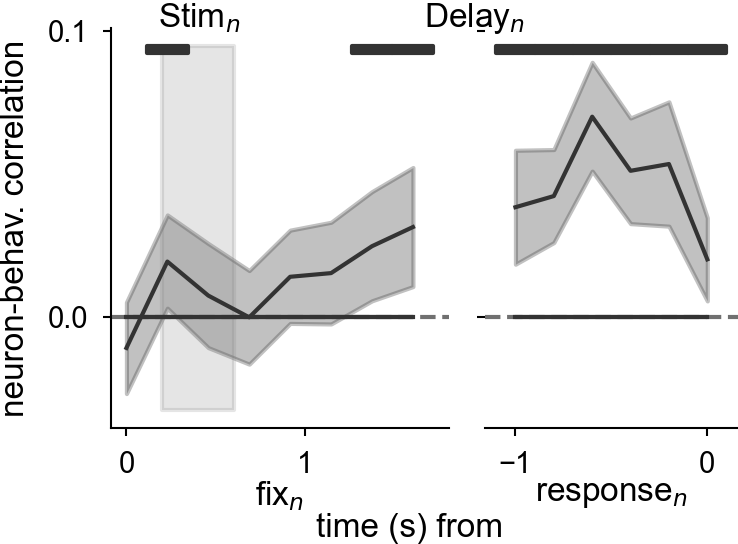

In [11]:
# compute correlations of neuron and behavior
# for each session get a correlation of neurons / behavior separately
CWCorr_all=[]
CWCorr_mono = {m:[] for m in monkeys}
borders = []
for monkey in monkeys:
    df_mono = df.loc[df.monkey==monkey]
    for session in np.unique(df_mono.session_continuous): # for each session
        df_sess = df_mono.loc[(df_mono.session_continuous==session)].copy().reset_index(drop=True)
        borders.append(df_sess.borders_full[0])

        # get decoder errors during delay timecourse
        DecoderErr = np.array([np.array(df_sess['prederror_ortho_combined'][i]) for i in df_sess.index])
        # get behavioral error
        Err = np.array([np.array(df_sess.behav_error_prev[i]) for i in df_sess.index])

        CWCorr=[]
        for time in range(DecoderErr.shape[1]): # for each time step in each session
            # get circular correlation of decoder, response error in each time step
            r,p = circ_corrcc(Err,DecoderErr[:,time], correction_uniform=True)
            CWCorr.append(r)    
        # average over left/right decoder
        CWCorr_mono[monkey].append(CWCorr)
        CWCorr_all.append(CWCorr)

assert len(CWCorr_all) == len(df.session_continuous.unique()), "Error: Not all sessions are taken into consideration"

# cut sessions to same length
CWCorr_all_cut,borders_mean = cut_task_timings(CWCorr_all, borders, 10)


# test significance from 0
pvalues = np.array(ttest_1samp(CWCorr_all_cut, 0, axis=0, nan_policy='omit')[1])
#print(pvalues)

plot_twolines_full(R=CWCorr_all_cut,base=np.zeros((CWCorr_all_cut.shape)), bins=bins,\
                  labelR='',labelB='', errorbars='CI', end_border=9, shorten_delay = 2,yticks=[0,0.1],\
                         borders=borders_mean, ylabel='neuron-behav. correlation', colors=[colors['Single'], '#333333'])
plt.tight_layout()
#plt.savefig('./Figures/Figure3/BumpdriftDelay_SaPeWa_200ms.svg', dpi=300)
plt.show()


In [12]:
x_coords = np.array(range(borders_mean[4],borders_mean[6]))*bins/1000
delay_end = CWCorr_all_cut[:,borders_mean[4]:borders_mean[6]]
slopes=[]
for s in range(len(delay_end)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_coords, delay_end[s])
    slopes.append(slope)

    
slopes = np.array(slopes)

# ttest
print(ttest_1samp(slopes, 0))

Ttest_1sampResult(statistic=4.953190456626329, pvalue=1.451627868309213e-05)


---

---

### Fig 3b: ipsi vs contra

In [13]:
#colors_ic={'ipsi':'#EF8354', 'contra':'#2E9FDC'}

# PREDICTONS
contraPred = [df_pred_noBorder.pred_complex_delay_left[idx] if df_pred_noBorder.leftHemi[idx]==CONTRA\
          else df_pred_noBorder.pred_complex_delay_right[idx] if df_pred_noBorder.rightHemi[idx]==CONTRA\
          else [np.nan for i in df_pred_noBorder.pred_complex_delay_left[idx]] for idx in df_pred_noBorder.index]
ipsiPred = [df_pred_noBorder.pred_complex_delay_left[idx] if df_pred_noBorder.leftHemi[idx]==IPSI\
        else df_pred_noBorder.pred_complex_delay_right[idx] if df_pred_noBorder.rightHemi[idx]==IPSI\
        else [np.nan for i in df_pred_noBorder.pred_complex_delay_left[idx]] for idx in df_pred_noBorder.index]


df_pred_noBorder['contraDecoderPred'] = contraPred
df_pred_noBorder['ipsiDecoderPred'] = ipsiPred
df_pred_noBorder['combinedDecoderPred'] = [np.mean([contraPred[i], ipsiPred[i]], axis=0)\
                                           for i in range(len(contraPred))]

# ERRORS
contraErr = [df_pred_noBorder.prederror_ortho_left[idx] if df_pred_noBorder.leftHemi[idx]==CONTRA\
          else df_pred_noBorder.prederror_ortho_right[idx] if df_pred_noBorder.rightHemi[idx]==CONTRA\
          else [np.nan for i in df_pred_noBorder.prederror_ortho_left[idx]] for idx in df_pred_noBorder.index]
ipsiErr = [df_pred_noBorder.prederror_ortho_left[idx] if df_pred_noBorder.leftHemi[idx]==IPSI\
        else df_pred_noBorder.prederror_ortho_right[idx] if df_pred_noBorder.rightHemi[idx]==IPSI\
        else [np.nan for i in df_pred_noBorder.prederror_ortho_left[idx]] for idx in df_pred_noBorder.index]


df_pred_noBorder['contraDecoderErr'] = contraErr
df_pred_noBorder['ipsiDecoderErr'] = ipsiErr
df_pred_noBorder['combinedDecoderErr'] = [circdist(np.angle(df_pred_noBorder['combinedDecoderPred'][i]),\
                                                  np.angle(df_pred_noBorder.targ_prev_xy[i]))\
                                         for i in df_pred_noBorder.index]

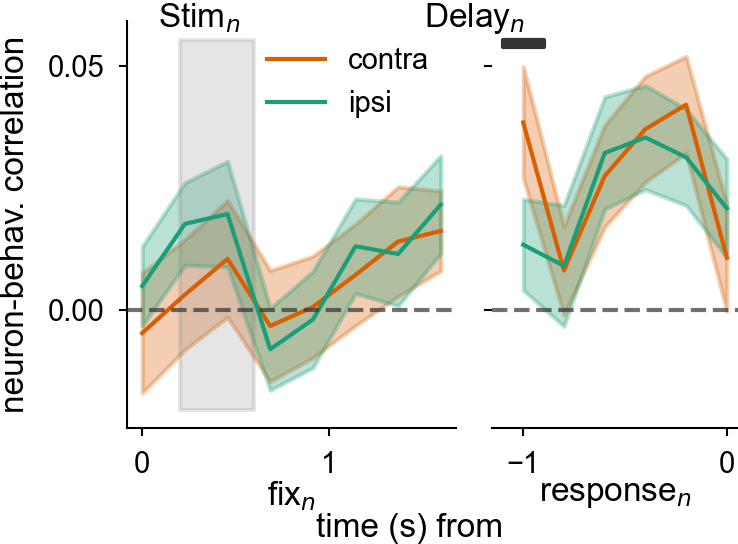

In [14]:
# compute correlations of neuron and behavior
# for each session get a correlation of neurons / behavior separately
colors_ic_int = [colors_ic['ipsi'], colors_ic['contra']]

CWCorr_all_ipsi=[]
CWCorr_mono_ipsi = {m:[] for m in monkeys}
CWCorr_all_contra=[]
CWCorr_mono_contra = {m:[] for m in monkeys}
borders = []
borders_mono = {m:[] for m in monkeys}
for monkey in monkeys:
    df_mono = df_pred_noBorder.loc[df_pred_noBorder.monkey==monkey]
    for session in np.unique(df_mono.session_continuous): # for each session
        df_sess = df_mono.loc[(df_mono.session_continuous==session)].copy().reset_index(drop=True)
        borders.append(df_sess.borders_full[0])
        borders_mono[monkey].append(df_sess.borders_full[0])

        # get decoder errors during delay timecourse
        DecoderErr_ipsi = np.array([np.array(df_sess['ipsiDecoderErr'][i]) for i in df_sess.index])
        DecoderErr_contra = np.array([np.array(df_sess['contraDecoderErr'][i]) for i in df_sess.index])
        # get behavioral error
        Err = np.array([np.array(df_sess.behav_error_prev[i]) for i in df_sess.index])

        CWCorr_i=[]
        CWCorr_c=[]
        for time in range(DecoderErr_ipsi.shape[1]): # for each time step in each session
            # get circular correlation of decoder, response error in each time step
            r,p = circ_corrcc(Err,DecoderErr_ipsi[:,time], correction_uniform=True)
            CWCorr_i.append(r) #
            r,p = circ_corrcc(Err,DecoderErr_contra[:,time], correction_uniform=True)
            CWCorr_c.append(r)    
        # average over left/right decoder
        CWCorr_mono_ipsi[monkey].append(CWCorr_i)
        CWCorr_all_ipsi.append(CWCorr_i)
        CWCorr_mono_contra[monkey].append(CWCorr_c)
        CWCorr_all_contra.append(CWCorr_c)


# cut sessions to same length
CWCorr_all_cut_ipsi,_ = cut_task_timings(CWCorr_all_ipsi, borders, 10)
CWCorr_all_cut_contra,borders_mean = cut_task_timings(CWCorr_all_contra, borders, 10)

plot_twolines_full(R=CWCorr_all_cut_contra,base=CWCorr_all_cut_ipsi, bins=bins,\
                  labelR='contra',labelB='ipsi', errorbars='SEM', end_border=9, shorten_delay =2,yticks=[0,0.05],\
                         borders=borders_mean, ylabel='neuron-behav. correlation',\
                   colors=[colors['Contralateral'], colors['Ipsilateral']])
plt.tight_layout()
#plt.savefig('./Figure3/BumpdriftDelay_IpsiContra_SaPeWa_200ms.svg')
plt.show()


### Supplement: Quantification

Ipsi: Ttest_1sampResult(statistic=3.0704180477730243, pvalue=0.003882183929001733)
Contra: Ttest_1sampResult(statistic=3.341385504805602, pvalue=0.0018467476368873392)
Ipsi-Contra: Ttest_relResult(statistic=-0.38572678014419826, pvalue=0.7017951311554913)


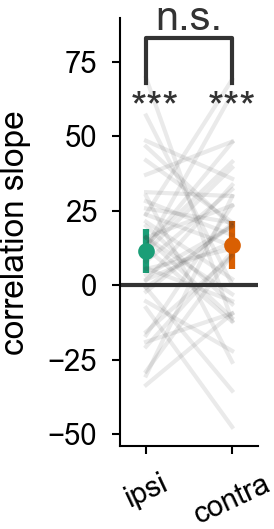

In [15]:
CWCorr_all_cut_ipsi,_ = cut_task_timings(CWCorr_all_ipsi, borders, 10)
CWCorr_all_cut_contra,borders_mean = cut_task_timings(CWCorr_all_contra, borders, 10)

x_coords = np.array(range(borders_mean[4],borders_mean[6]))*bins/1000
delay_end_ipsi = CWCorr_all_cut_ipsi[:,borders_mean[4]:borders_mean[6]]
delay_end_contra = CWCorr_all_cut_contra[:,borders_mean[4]:borders_mean[6]]
slopes_left=[]
slopes_right=[]
for s in range(len(delay_end_ipsi)):
    slopel, intercept, r_value, p_value, std_err = stats.linregress(x_coords, delay_end_ipsi[s])
    slopes_left.append(slopel)
    sloper, intercept, r_value, p_value, std_err = stats.linregress(x_coords, delay_end_contra[s])
    slopes_right.append(sloper)
    
slopes_ipsi = np.array(slopes_left)
slopes_contra = np.array(slopes_right)

# plot

f, ax = plt.subplots(figsize=(1.1,2))
ax.axhline(color='#333333')
ax.plot([np.zeros((slopes_ipsi.shape)), np.ones((slopes_contra.shape))],\
        [slopes_ipsi, slopes_contra], color='#333333', alpha=0.1)
#ax.scatter(np.zeros((slopes_ipsi.shape)), slopes_ipsi, color=colors_ic['ipsi'], alpha=0.1)
ax.errorbar(0, np.mean(slopes_ipsi), yerr= 2*sem(slopes_ipsi),\
            color=colors['Ipsilateral'], marker='o', elinewidth=1.5)
#ax.scatter(np.ones((slopes_contra.shape)), slopes_contra, color=colors_ic['contra'], alpha=0.1)
ax.errorbar(1, np.mean(slopes_contra), yerr= 2*sem(slopes_contra),\
            color=colors['Contralateral'], marker='o', elinewidth=1.5)
y0, y1 = ax.get_ylim()

# figure out stats
stats_i = ['***' if ttest_1samp(slopes_ipsi, 0)[1] < 0.005\
           else '**' if ttest_1samp(slopes_ipsi, 0)[1] < 0.01\
            else '*' if ttest_1samp(slopes_ipsi, 0)[1] < 0.05 else 'n.s.'][0]
stats_c = ['***' if ttest_1samp(slopes_contra, 0)[1] < 0.005\
           else '**' if ttest_1samp(slopes_contra, 0)[1] < 0.01\
            else '*' if ttest_1samp(slopes_contra, 0)[1] < 0.05 else 'n.s.'][0]
stats_diff = ['***' if ttest_rel(slopes_ipsi, slopes_contra)[1] < 0.005\
           else '**' if ttest_rel(slopes_ipsi, slopes_contra)[1] < 0.01\
            else '*' if ttest_rel(slopes_ipsi, slopes_contra)[1] < 0.05 else 'n.s.'][0]

y0, y1 = ax.get_ylim()
# stats
ax.annotate(stats_i,(0.1, y1-3*y1/10), ha='center', va='bottom', fontsize=10, color='#333333')
ax.annotate(stats_c,(1, y1-3*y1/10), ha='center', va='bottom', fontsize=10, color='#333333')
ax.plot([0,0,1,1],\
        [y1-1*y1/10,y1+y1/10, y1+y1/10, y1-1*y1/10], linewidth=1, color='#333333')
ax.annotate(stats_diff,\
           (0.5, y1+y1/10), ha='center', va='bottom', fontsize=10, color='#333333')

ax.set_ylabel('hemisphere')
ax.set_ylabel('correlation slope')
ax.set_xticks([0,1])
ax.set_xticklabels(['ipsi', 'contra'], rotation = 25)
# xticks = plt.gca().get_xticklabels()
# xticks[0].set_color(colors['Ipsilateral'])
# xticks[1].set_color(colors['Contralateral'])
ax.set_xlim([-0.3, 1.3])
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure3/IpsiContraBumpDriftSlope200ms_all'+'.svg')

print('Ipsi: '+str(ttest_1samp(slopes_ipsi, 0)))
print('Contra: '+str(ttest_1samp(slopes_contra, 0)))
print('Ipsi-Contra: '+str(ttest_rel(slopes_ipsi, slopes_contra)))


### Fig 3c + Supplement: left vs right

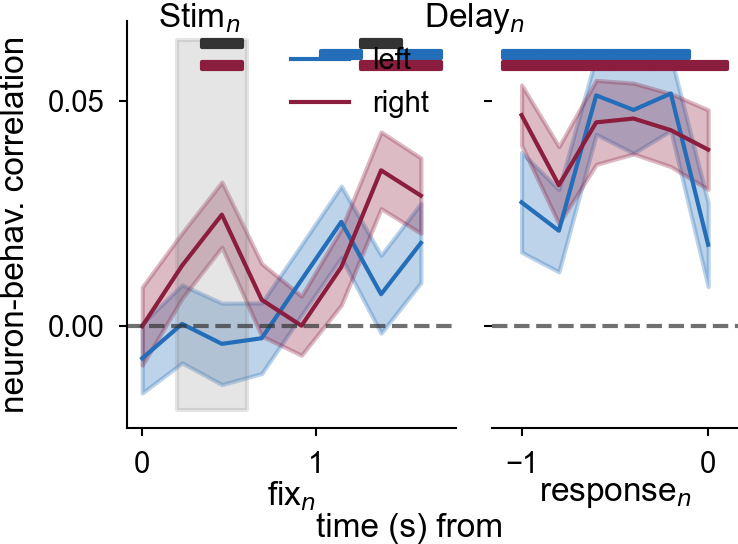

In [16]:
colors_lr=['#508AA8', '#9C072C'] # left, right

# compute correlations of neuron and behavior
# for each session get a correlation of neurons / behavior separately
CWCorr_all_left=[]
CWCorr_mono_left = {m:[] for m in monkeys}
CWCorr_all_right=[]
CWCorr_mono_right = {m:[] for m in monkeys}
borders = []
borders_mono = {m:[] for m in monkeys}
for monkey in monkeys:
    df_mono = df.loc[df.monkey==monkey]
    for session in np.unique(df_mono.session_continuous): # for each session
        df_sess = df_mono.loc[(df_mono.session_continuous==session)].copy().reset_index(drop=True)
        borders.append(df_sess.borders_full[0])
        borders_mono[monkey].append(df_sess.borders_full[0])

        # get decoder errors during delay timecourse
        DecoderErr_left = np.array([np.array(df_sess['prederror_ortho_left'][i]) for i in df_sess.index])
        DecoderErr_right = np.array([np.array(df_sess['prederror_ortho_right'][i]) for i in df_sess.index])
        # get behavioral error
        Err = np.array([np.array(df_sess.behav_error_prev[i]) for i in df_sess.index])

        CWCorr_left=[]
        CWCorr_right=[]
        for time in range(DecoderErr_left.shape[1]): # for each time step in each session
            # get circular correlation of decoder, response error in each time step
            r,p = circ_corrcc(Err,DecoderErr_left[:,time], correction_uniform=True)
            CWCorr_left.append(r) #
            r,p = circ_corrcc(Err,DecoderErr_right[:,time], correction_uniform=True)
            CWCorr_right.append(r)    
        # average over left/right decoder
        CWCorr_mono_left[monkey].append(CWCorr_left)
        CWCorr_all_left.append(CWCorr_left)
        CWCorr_mono_right[monkey].append(CWCorr_right)
        CWCorr_all_right.append(CWCorr_right)


# cut sessions to same length
CWCorr_all_cut_left,_ = cut_task_timings(CWCorr_all_left, borders, 10)
CWCorr_all_cut_right,borders_mean = cut_task_timings(CWCorr_all_right, borders, 10)

plot_twolines_full(R=CWCorr_all_cut_left,base=CWCorr_all_cut_right, bins=bins,\
                  labelR='left',labelB='right', errorbars='SEM', end_border=9,shorten_delay = 2,yticks=[0,0.05],\
                         borders=borders_mean, ylabel='neuron-behav. correlation',\
                   colors=[colors['Left'],colors['Right']], significances=True)
plt.tight_layout()
#plt.savefig('./Figures/Figure3/BumpdriftDelay_LeftRight_SaPeWa_200ms.svg')
plt.show()


Left: Ttest_1sampResult(statistic=4.584711812615922, pvalue=4.5985133749702924e-05)
Right: Ttest_1sampResult(statistic=4.76519519019905, pvalue=2.6198398167836716e-05)
Left-Right: Ttest_relResult(statistic=0.37502304416580706, pvalue=0.7096751289803946)


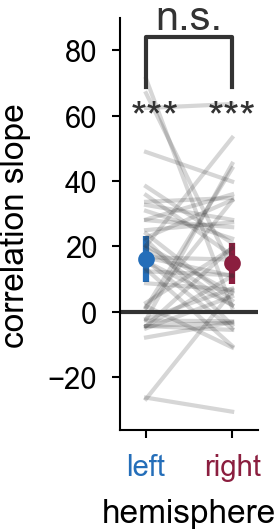

In [17]:
# cut sessions to same length
CWCorr_all_cut_left,_ = cut_task_timings(CWCorr_all_left, borders, 10)
CWCorr_all_cut_right,borders_mean = cut_task_timings(CWCorr_all_right, borders, 10)

x_coords = np.array(range(borders_mean[4],borders_mean[6]))*bins/1000
delay_end_left = CWCorr_all_cut_left[:,borders_mean[4]:borders_mean[6]]
delay_end_right = CWCorr_all_cut_right[:,borders_mean[4]:borders_mean[6]]
slopes_left=[]
slopes_right=[]
for s in range(len(delay_end_left)):
    slopel, intercept, r_value, p_value, std_err = stats.linregress(x_coords, delay_end_left[s])
    slopes_left.append(slopel)
    sloper, intercept, r_value, p_value, std_err = stats.linregress(x_coords, delay_end_right[s])
    slopes_right.append(sloper)
    
slopes_left = np.array(slopes_left)
slopes_right = np.array(slopes_right)

# plot

f, ax = plt.subplots(figsize=(1.1,2.))
sns.despine()
ax.axhline(color='#333333')
ax.plot([np.zeros((slopes_left.shape)), np.ones((slopes_right.shape))],\
        [slopes_left, slopes_right], color='#333333', alpha=0.2)
#ax.scatter(np.zeros((slopes_left.shape)), slopes_left, color=colors_lr[0], alpha=0.1)
ax.errorbar(0, np.mean(slopes_left), yerr= 2*sem(slopes_left), color=colors['Left'], marker='o', elinewidth=1.5)
#ax.scatter(np.ones((slopes_right.shape)), slopes_right, color=colors_lr[1], alpha=0.1)
ax.errorbar(1, np.mean(slopes_right), yerr= 2*sem(slopes_right), color=colors['Right'], marker='o', elinewidth=1.5)
y0, y1 = ax.get_ylim()

# figure out stats
stats_l = ['***' if ttest_1samp(slopes_left, 0)[1] < 0.005\
           else '**' if ttest_1samp(slopes_left, 0)[1] < 0.01\
            else '*' if ttest_1samp(slopes_left, 0)[1] < 0.05 else 'n.s.'][0]
stats_r = ['***' if ttest_1samp(slopes_right, 0)[1] < 0.005\
           else '**' if ttest_1samp(slopes_right, 0)[1] < 0.01\
            else '*' if ttest_1samp(slopes_right, 0)[1] < 0.05 else 'n.s.'][0]
stats_diff = ['***' if ttest_rel(slopes_left, slopes_right)[1] < 0.005\
           else '**' if ttest_rel(slopes_left, slopes_right)[1] < 0.01\
            else '*' if ttest_rel(slopes_left, slopes_right)[1] < 0.05 else 'n.s.'][0]

y0, y1 = ax.get_ylim()
ax.annotate(stats_l,(0.1, y1-3*y1/10), ha='center', va='bottom', fontsize=10, color='#333333')
ax.annotate(stats_r,(1, y1-3*y1/10), ha='center', va='bottom', fontsize=10, color='#333333')
ax.plot([0,0,1,1],\
        [y1-1*y1/10,y1+y1/10, y1+y1/10, y1-1*y1/10], linewidth=1, color='#333333')
ax.annotate(stats_diff,\
           (0.5, y1+y1/10), ha='center', va='bottom', fontsize=10, color='#333333')

ax.set_xlabel('hemisphere')
ax.set_ylabel('correlation slope')
ax.set_xticks([0,1])
ax.set_xticklabels(['left', 'right'])
xticks = plt.gca().get_xticklabels()
xticks[0].set_color(colors['Left'])
xticks[1].set_color(colors['Right'])
ax.set_xlim([-0.3, 1.3])
#ax.set_ylim([-0.05, 0.17])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Figure3/LeftRightBumpDriftSlope200ms_all'+'.svg')

print('Left: '+str(ttest_1samp(slopes_left, 0)))
print('Right: '+str(ttest_1samp(slopes_right, 0)))
print('Left-Right: '+str(ttest_rel(slopes_left, slopes_right)))

---

## Error correlations

In [20]:
# DELAY DECODER CORRELATIONS, REPEATED K-FOLD, 200ms
with open('./Results/Figure3/DelayDecoderCorrelations_bins200.pickle', 'rb') as handle:
    df_correlate = pickle.load(handle)
    
# which prediction to analyse ('prediction_' for regular decoder, 'prediction_reduced_' for saccade-reduced model)
chosen_pred = 'prediction_'#'prediction_reduced_'#

df_correlate['session_continuous'] = df_correlate['monkey']+df_correlate['session'].astype(str)
df_correlate.drop(index=np.where((df_correlate.session_continuous=='Pe2.0'))[0], inplace=True)
df_correlate.reset_index(drop=True, inplace=True)

bins=200/1000
    
# AVERAGE OUT CROSSVALIDATIONS
meancrossval = {chosen_pred+'left1':[], chosen_pred+'left2':[], chosen_pred+'right1':[], chosen_pred+'right2':[],\
                'real':[], 'borders_full':[], 'monkey':[], 'session':[], 'session_continuous':[]}
for m in np.unique(df_correlate.monkey):
    for s in np.unique(df_correlate.loc[(df_correlate.monkey==m)].session):
        df_mono = df_correlate.loc[(df_correlate.monkey==m) & (df_correlate.session==s)]
        for hemi in ['left1', 'left2', 'right1', 'right2']:
            meancrossval[chosen_pred+hemi].append(np.mean([np.array(df_mono[chosen_pred+hemi][i])\
                                                             for i in df_mono.index], axis=0))
        meancrossval['real'].append(np.mean([np.array(df_mono.real[i]) for i in df_mono.index], axis=0))
        meancrossval['borders_full'].append(df_mono.borders_full.values[0][0])
        meancrossval['session_continuous'].append(df_mono.session_continuous.values[0])
        meancrossval['monkey'].append(m)
        meancrossval['session'].append(s)
        
df_meancorrelate = pd.DataFrame(meancrossval)

# compute real part, complex part, prediction angle / strength /error
subhemis = ['left1', 'left2', 'right1', 'right2']

for hemi in subhemis:
    df_correlate[chosen_pred+hemi] = [np.array(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['real_predict_'+hemi] = [np.real(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['imag_predict_'+hemi] = [np.imag(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['angle_predict_'+hemi] = [np.angle(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['strength_predict_'+hemi] = [np.abs(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['error_predict_'+hemi] = [np.array([circdist(np.angle(df_correlate[chosen_pred+hemi][c][t]),\
                                                           np.angle(df_correlate['real'][c][t]))\
                                                  for t in range(len(df_correlate['real'][c]))])\
                                                 for c in df_correlate.index]
    

#### individ. monkeys

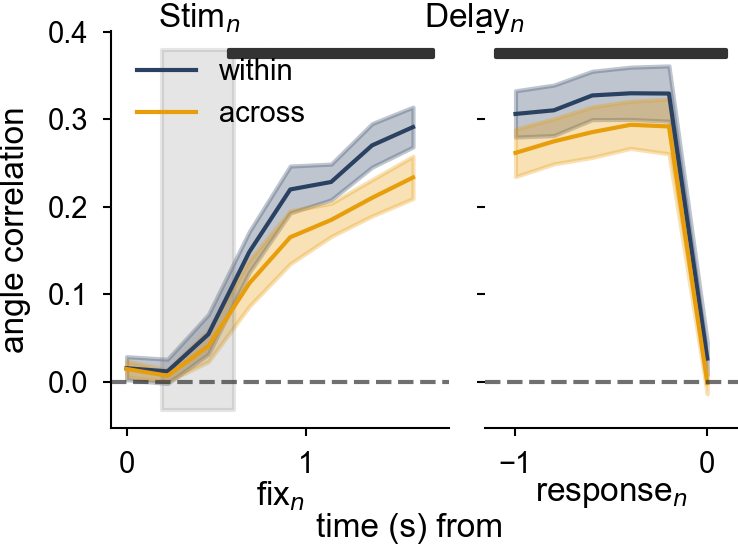

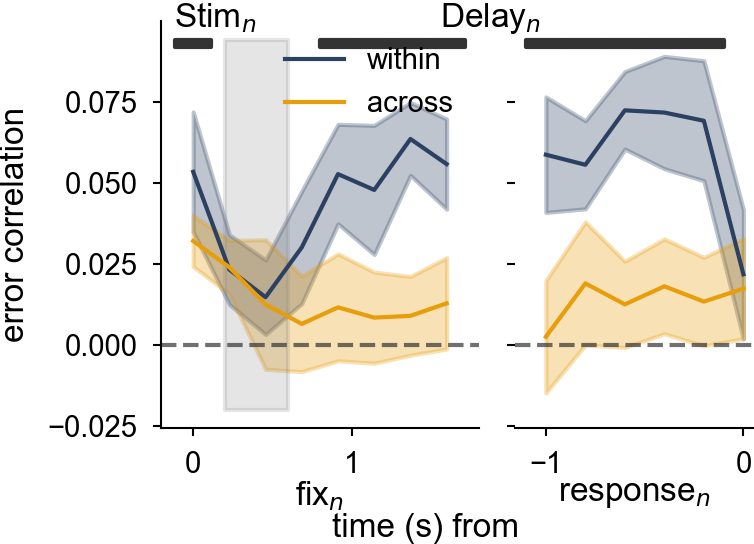

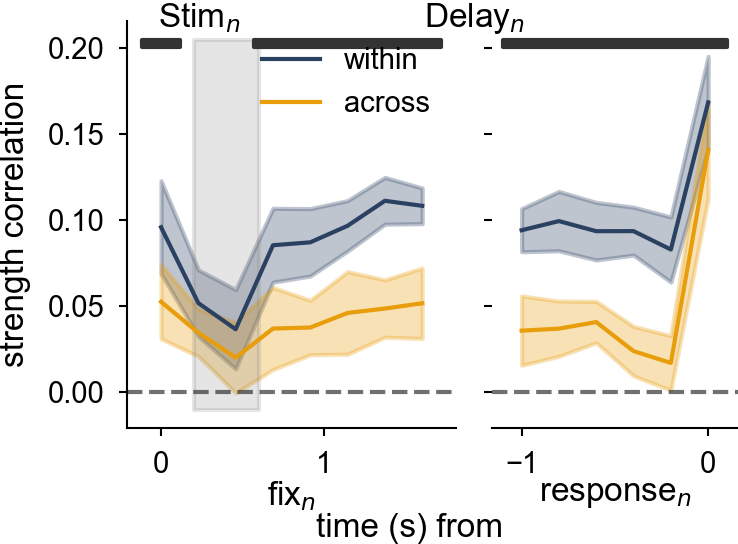

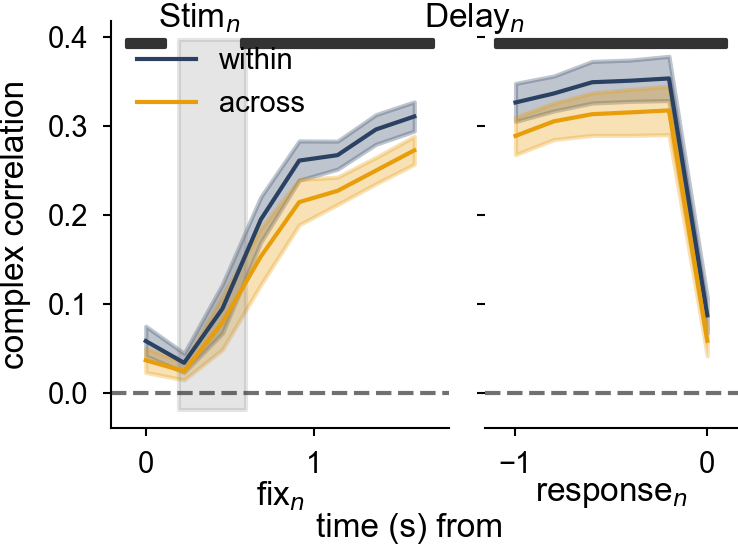

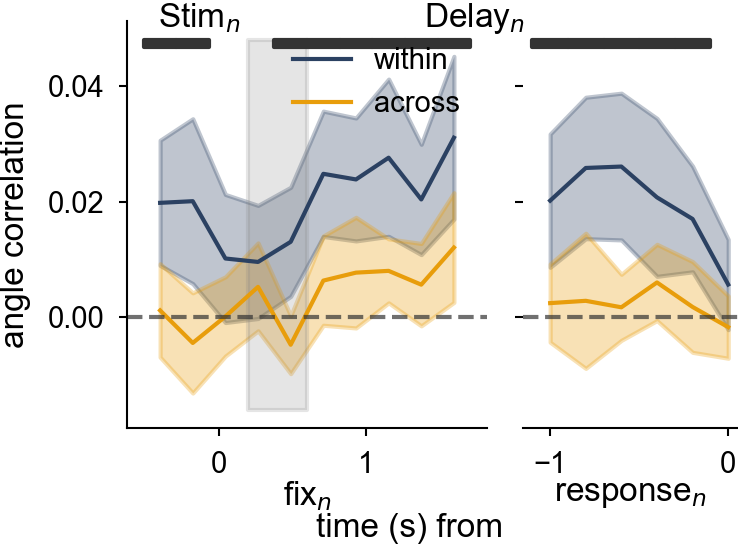

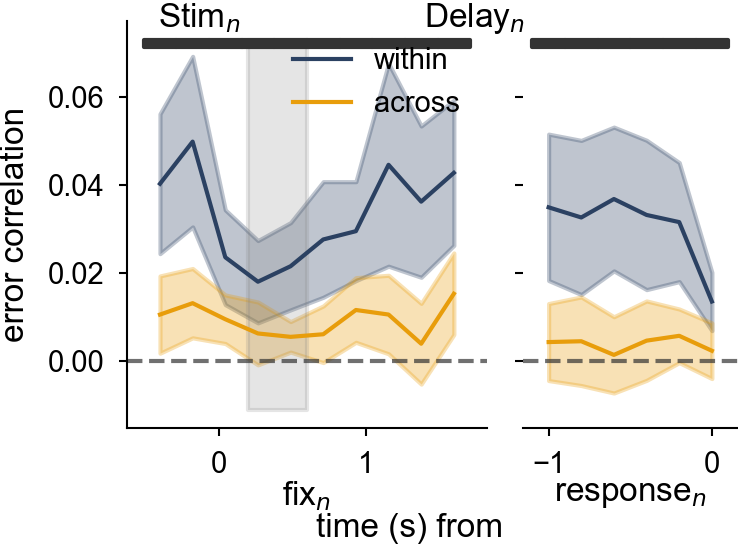

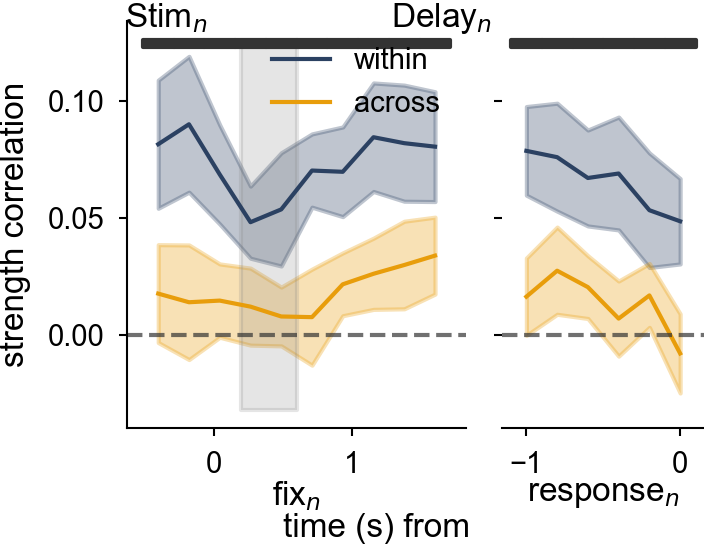

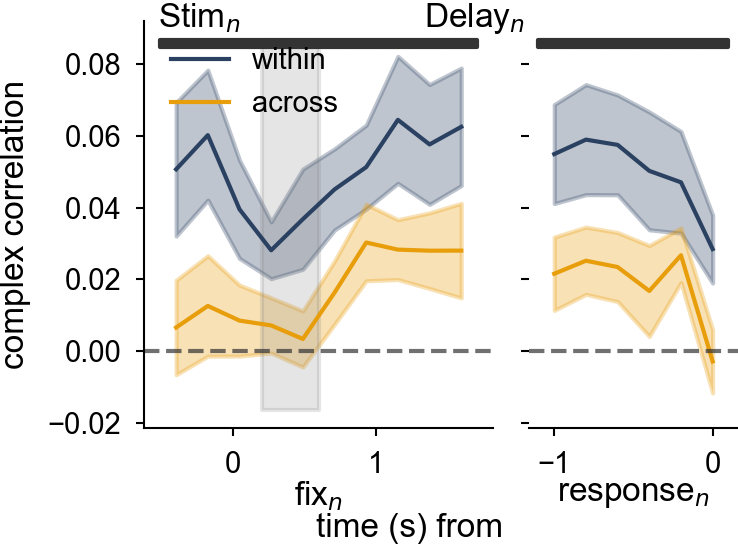

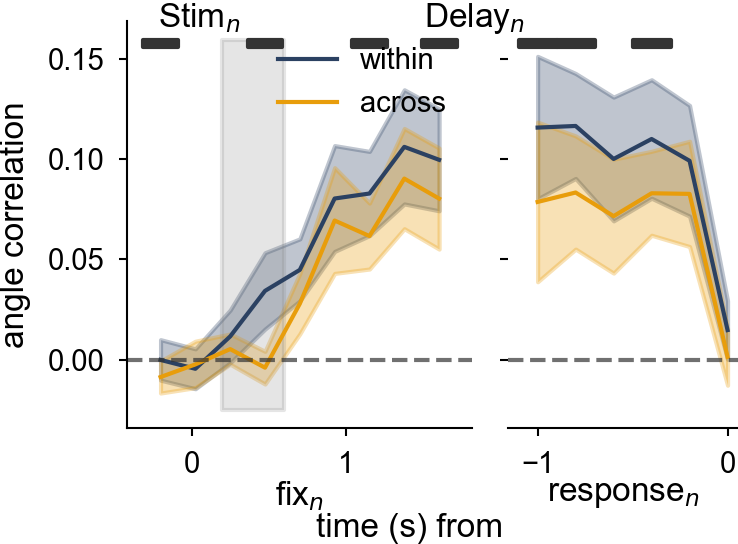

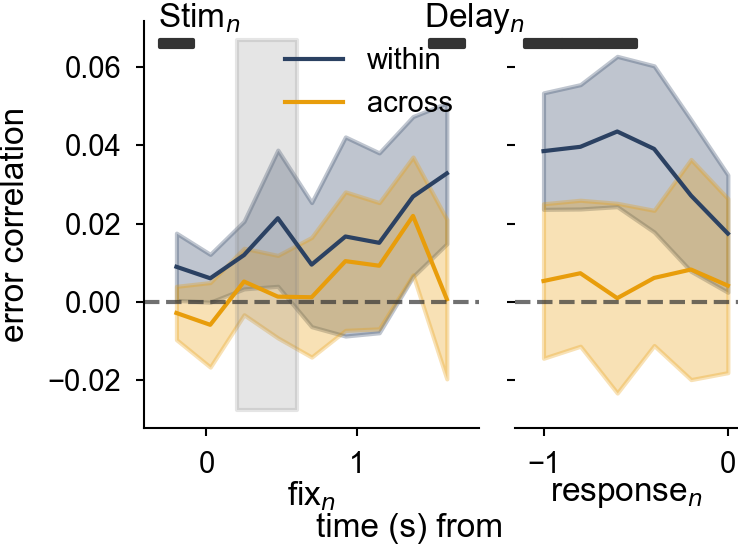

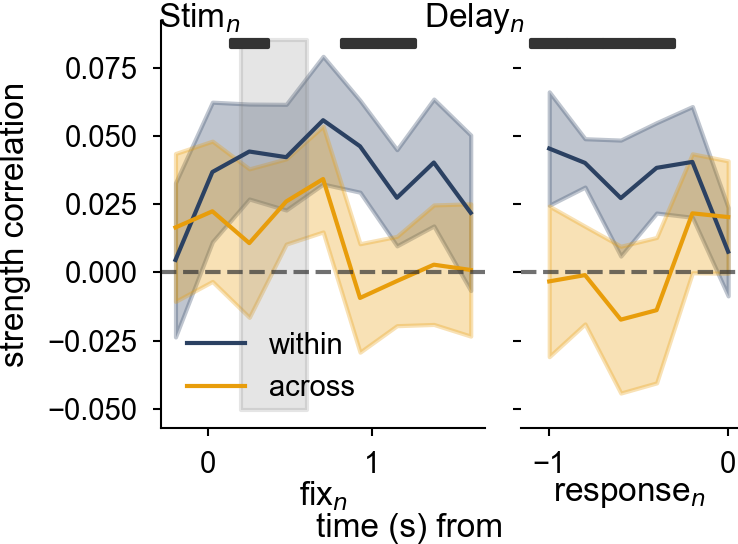

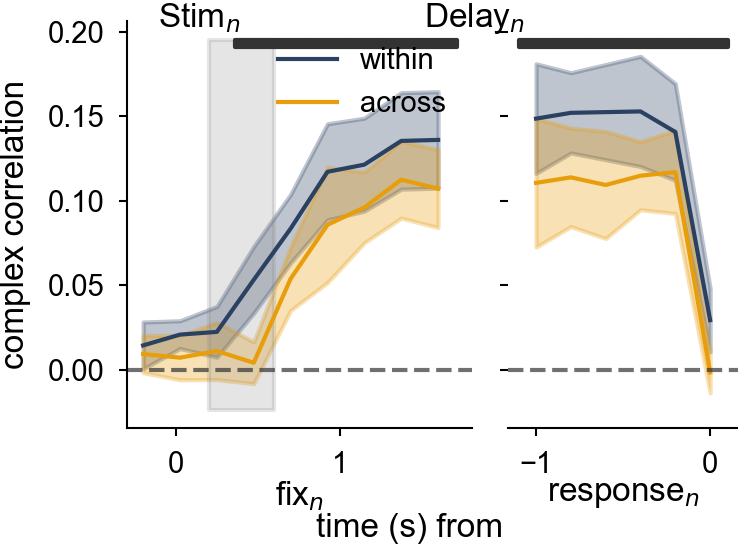

In [21]:
angle = {m: {f:[] for f in subhemis} for m in monkeys}\


import copy
borders = []
corr_variables = ['angle', 'error', 'strength', 'complex']
corr_across_all = {i: [] for i in corr_variables}
corr_within_all = {i: [] for i in corr_variables}
for monkey in ['Sa', 'Pe', 'Wa']:#monkeys:
    corr_across = {i: [] for i in corr_variables}
    corr_within = {i: [] for i in corr_variables}
    borders_mono=[]
    for s,session in enumerate(np.unique(df_correlate.loc[df_correlate.monkey==monkey]['session'])):
        df_sess = df_correlate.loc[(df_correlate.monkey==monkey) & (df_correlate.session==session)].reset_index()
        borders_mono.append(df_sess.borders_full[0][0])
        borders.append(df_sess.borders_full[0][0])
        
        # COMPLEX CORRELATIONS:
        
        # complex similarity: a*b*cos(theta-gamma)
        across=[]
        within=[]
        for idx,part in enumerate(['left', 'right']):
            # mean across trials, crossval of: a*b*cos(alpha-beta)*2/sqrt(a^2+b^2)
            across.append(np.mean(np.mean([2*(df_sess.loc[crossval, 'strength_predict_left'+str(idx+1)]*\
                                    df_sess.loc[crossval,'strength_predict_right'+str(idx+1)]*\
                                    np.cos(df_sess.loc[crossval, 'angle_predict_left'+str(idx+1)]-\
                                    df_sess.loc[crossval, 'angle_predict_right'+str(idx+1)]))/\
                                    (df_sess.loc[crossval, 'strength_predict_left'+str(idx+1)]**2+\
                                    df_sess.loc[crossval, 'strength_predict_right'+str(idx+1)]**2)\
                                           for crossval in df_sess.index], axis=1), axis=0))
            within.append(np.mean(np.mean([2*(df_sess.loc[crossval, 'strength_predict_'+part+'1']*\
                                    df_sess.loc[crossval, 'strength_predict_'+part+'2']*\
                                    np.cos(df_sess.loc[crossval, 'angle_predict_'+part+'1']-\
                                    df_sess.loc[crossval, 'angle_predict_'+part+'2']))/\
                                    (df_sess.loc[crossval, 'strength_predict_'+part+'1']**2+\
                                    df_sess.loc[crossval, 'strength_predict_'+part+'2']**2)\
                                           for crossval in df_sess.index], axis=1), axis=0))
        # combine two parts (within11, within22; acrossLR, acrossRL)
        corr_across['complex'].append(np.mean(across, axis=0))
        corr_across_all['complex'].append(np.mean(across, axis=0))
        corr_within['complex'].append(np.mean(within, axis=0))
        corr_within_all['complex'].append(np.mean(within, axis=0))
        # save across sessions per monkey

        # CIRCULAR CORRELATIONS:

        # only circular correlation in angle space
        for var in ['angle', 'error']:

            part1 = np.mean([[circ_corrcc(df_sess.loc[crossval, var+'_predict_left1'][:,t],\
                                       df_sess.loc[crossval, var+'_predict_right1'][:,t], correction_uniform=True)[0]\
                          for t in range(len(df_sess.loc[crossval, var+'_predict_left1'][0]))]\
                          for crossval in range(len(df_sess.index))], axis=0)
            part2 = np.mean([[circ_corrcc(df_sess.loc[crossval, var+'_predict_left2'][:,t],\
                                       df_sess.loc[crossval, var+'_predict_right2'][:,t], correction_uniform=True)[0]\
                              for t in range(len(df_sess.loc[crossval, var+'_predict_left2'][0]))]\
                              for crossval in range(len(df_sess.index))], axis=0)

            # mean across two halves
            corr_across[var].append(np.mean([part1, part2], axis=0))
            corr_across_all[var].append(np.mean([part1, part2], axis=0))

            # within hemispheres
            part1 = np.mean([[circ_corrcc(df_sess.loc[crossval, var+'_predict_left1'][:,t],\
                                          df_sess.loc[crossval, var+'_predict_left2'][:,t], correction_uniform=True)[0]\
                              for t in range(len(df_sess.loc[crossval, var+'_predict_left1'][0]))]\
                              for crossval in range(len(df_sess.index))], axis=0)
            part2 = np.mean([[circ_corrcc(df_sess.loc[crossval, var+'_predict_right1'][:,t],\
                                          df_sess.loc[crossval, var+'_predict_right2'][:,t], correction_uniform=True)[0]\
                              for t in range(len(df_sess.loc[crossval, var+'_predict_right1'][0]))]\
                              for crossval in range(len(df_sess.index))], axis=0)
            corr_within[var].append(np.mean([part1, part2], axis=0))
            corr_within_all[var].append(np.mean([part1, part2], axis=0))

        # STRENGTH CORRELATIONS: ALONG STIMULUS DIMENSION (for comparing react, delay)
            
        # when not angles, use pearon correlation (non-circular)
        var='strength'
        # get strength of projection onto stimulus dimension (complex prediction * complex conjugate of stimulus)
        #cc_stimulus = np.conjugate(df_sess.real[0]) # stimulus is the same across crossvals
        cc_stimulus = np.cos(np.angle(df_sess.real[0])) - 1j*np.sin(np.angle(df_sess.real[0]))
        
        # for within / across hemispheres correlate the strength of the decoder along the stimulus location
        part = {i:[] for i in [1,2]}
        for p in [1,2]:
            # get real part (strength) of prediction*cc(stimulus) (projection onto stim dimension)
            part[p] = np.mean([[pearsonr(np.real(df_sess.loc[crossval, 'prediction_left'+str(p)][:,t]*cc_stimulus),\
                               np.real(df_sess.loc[crossval, 'prediction_right'+str(p)][:,t]*cc_stimulus))[0]\
                      for t in range(len(df_sess.loc[crossval, 'prediction_left1'][0]))]\
                      for crossval in range(len(df_sess.index))], axis=0)

        # mean across two halves
        corr_across[var].append(np.mean([part[1], part[2]], axis=0))
        corr_across_all[var].append(np.mean([part[1], part[2]], axis=0))

        # within hemispheres
        part1 = np.mean([[pearsonr(np.real(df_sess.loc[crossval, 'prediction_left1'][:,t]*cc_stimulus),\
                               np.real(df_sess.loc[crossval, 'prediction_left2'][:,t]*cc_stimulus))[0]\
                      for t in range(len(df_sess.loc[crossval, 'prediction_left1'][0]))]\
                      for crossval in range(len(df_sess.index))], axis=0)
        part2 = np.mean([[pearsonr(np.real(df_sess.loc[crossval, 'prediction_right1'][:,t]*cc_stimulus),\
                               np.real(df_sess.loc[crossval, 'prediction_right2'][:,t]*cc_stimulus))[0]\
                      for t in range(len(df_sess.loc[crossval, 'prediction_right1'][0]))]\
                      for crossval in range(len(df_sess.index))], axis=0)
        corr_within[var].append(np.mean([part1, part2], axis=0))
        corr_within_all[var].append(np.mean([part1, part2], axis=0))

    # average out crossvalidations
    #z_scored_mono = [np.mean(z_scored_mono[sess], axis=0) for sess in range(len(z_scored_mono))]
    corr_variables = ['angle', 'error', 'strength', 'complex']
    Corr_mono_within = {i: [] for i in corr_variables}
    Corr_mono_across = {i: [] for i in corr_variables}
    for var in corr_variables:
        # cut all sessions to same length
        
        Corr_mono_within[var],borders_mean = cut_task_timings(corr_within[var], borders_mono, 15)
        Corr_mono_across[var],borders_mean = cut_task_timings(corr_across[var], borders_mono, 15)

        plot_twolines_full(R=Corr_mono_within[var],base=Corr_mono_across[var], bins=bins,\
                          labelR='within',labelB='across', errorbars='CI',shorten_delay =2, end_border=9,\
                                 borders=borders_mean, ylabel=var+' correlation',\
                          colors = [colors['Within'], colors['Across']])
        plt.tight_layout()

### Fig 3e: across monkeys 

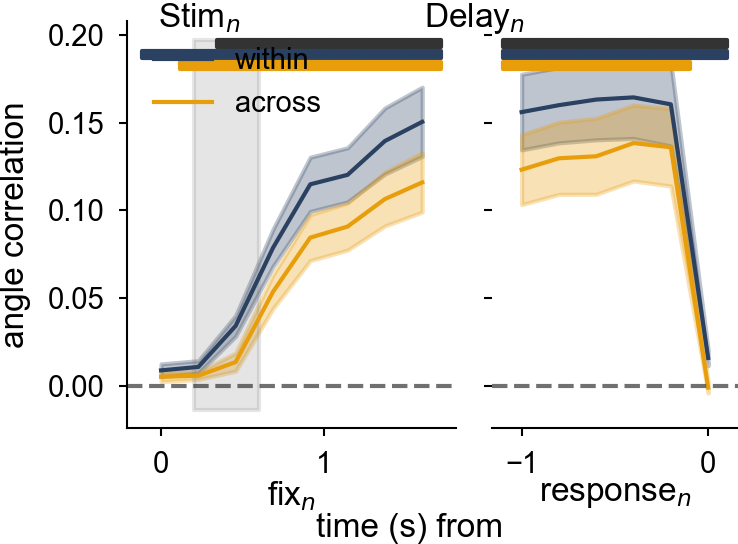

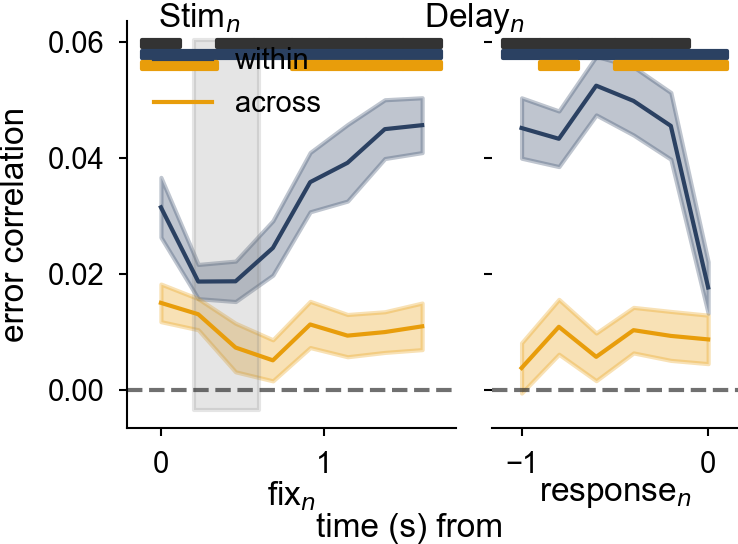

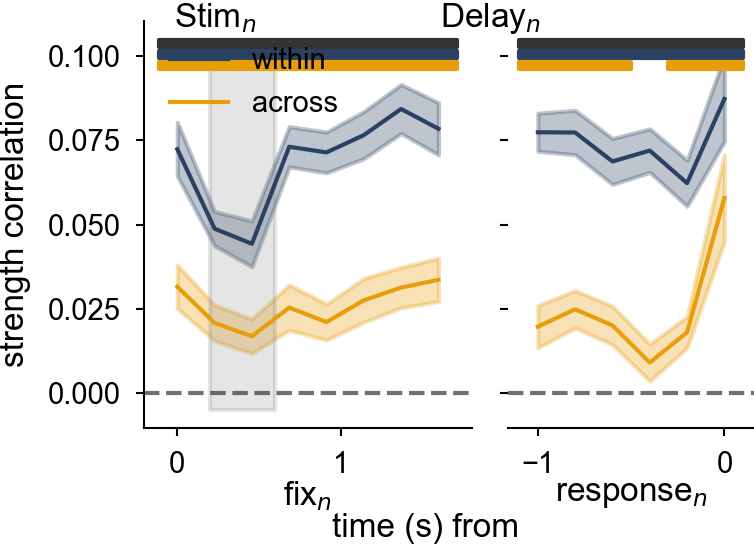

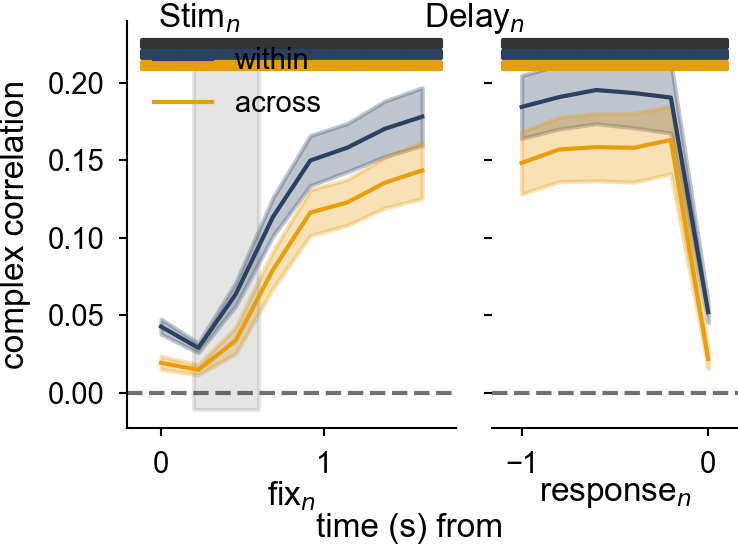

In [22]:
# cut all sessions to same length
corr_variables = ['angle', 'error', 'strength', 'complex']
Corr_within_ipsi_all = {i: [] for i in corr_variables}
Corr_within_contra_all = {i: [] for i in corr_variables}
for var in corr_variables:
    # cut all sessions to same length
    corr_within,borders_mean = cut_task_timings(corr_within_all[var], borders, 15)
    corr_across,borders_mean = cut_task_timings(corr_across_all[var], borders, 15)
    
    if (var!='error') & (var!='strength'):
        plot_twolines_full(R=corr_within,base=corr_across, bins=bins,\
                          labelR='within',labelB='across', errorbars='SEM',shorten_delay =2,\
                           colors = [colors['Within'], colors['Across']],\
                                 borders=borders_mean, ylabel=var+' correlation', end_border=9, significances=True)
    else:
        plot_twolines_full(R=corr_within,base=corr_across, bins=bins,\
                          labelR='within',labelB='across', errorbars='SEM',shorten_delay =2,\
                           end_border=9,colors = [colors['Within'], colors['Across']],\
                                 borders=borders_mean, ylabel=var+' correlation', significances=True)
    plt.ylim(auto=True)
    plt.tight_layout()
    #plt.savefig('./Figures/Figure3/'+var+'Correlations200ms_all'+'.svg')
    plt.show()

In [23]:
# TEST angle (average delay) correlation for text

corr_within,borders_mean = cut_task_timings(corr_within_all['angle'], borders, 15)
corr_across,borders_mean = cut_task_timings(corr_across_all['angle'], borders, 15)

ttest_rel(np.mean(corr_within[:,borders_mean[5]:borders_mean[6]-1], axis=1),\
          np.mean(corr_across[:,borders_mean[5]:borders_mean[6]-1], axis=1))

print(ttest_1samp(np.mean(corr_within[:,borders_mean[5]:borders_mean[6]-1], axis=1), 0))
print(ttest_1samp(np.mean(corr_across[:,borders_mean[5]:borders_mean[6]-1], axis=1), 0))

Ttest_1sampResult(statistic=7.253207554647322, pvalue=9.649076497752294e-09)
Ttest_1sampResult(statistic=6.34362098239981, pvalue=1.726621397020357e-07)


### Fig 3f: Quantification

Within: Ttest_1sampResult(statistic=11.186716548247823, pvalue=9.732654599904144e-14)
Across: Ttest_1sampResult(statistic=5.1973213838257415, pvalue=6.707547708578511e-06)
Within-Across: Ttest_relResult(statistic=9.077439762148597, pvalue=3.684580612350643e-11)


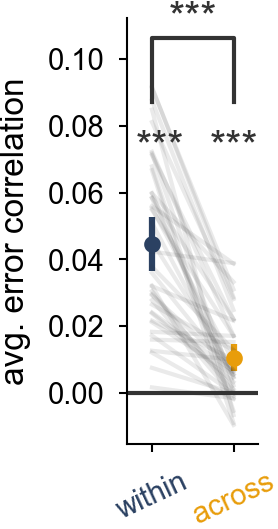

In [24]:
delay_avg_within = np.mean([corr_within_all['error'][i][borders_mean[5]:borders_mean[6]]\
                           for i in range(len(corr_within_all['error']))], axis=1)
delay_avg_across = np.mean([corr_across_all['error'][i][borders_mean[5]:borders_mean[6]]\
                           for i in range(len(corr_within_all['error']))], axis=1)

f, ax = plt.subplots(figsize=(1.1,2))
ax.axhline(color='#333333')
ax.plot([np.zeros((len(delay_avg_within))), np.ones((len(delay_avg_across)))],\
        [delay_avg_within, delay_avg_across], color='#333333', alpha=0.1)
#ax.scatter(np.zeros((len(delay_avg_within))), delay_avg_within, color='darkgreen', alpha=0.1)
ax.errorbar(0, np.mean(delay_avg_within), yerr=2*sem(delay_avg_within),\
            color=colors['Within'], marker='o', elinewidth=1.5)
#ax.scatter(np.ones((len(delay_avg_across))), delay_avg_across, color='darkorange', alpha=0.1)
ax.errorbar(1, np.mean(delay_avg_across), yerr=2*sem(delay_avg_across),\
            color=colors['Across'], marker='o', elinewidth=1.5)
y0, y1 = ax.get_ylim()

# figure out stats
stats_w = ['***' if ttest_1samp(delay_avg_within, 0)[1] < 0.005\
           else '**' if ttest_1samp(delay_avg_within, 0)[1] < 0.01\
            else '*' if ttest_1samp(delay_avg_within, 0)[1] < 0.05 else 'n.s.'][0]
stats_a = ['***' if ttest_1samp(delay_avg_across, 0)[1] < 0.005\
           else '**' if ttest_1samp(delay_avg_across, 0)[1] < 0.01\
            else '*' if ttest_1samp(delay_avg_across, 0)[1] < 0.05 else 'n.s.'][0]
stats_diff = ['***' if ttest_rel(delay_avg_within, delay_avg_across)[1] < 0.005\
           else '**' if ttest_rel(delay_avg_within, delay_avg_across)[1] < 0.01\
            else '*' if ttest_rel(delay_avg_within, delay_avg_across)[1] < 0.05 else 'n.s.'][0]

y0, y1 = ax.get_ylim()
ax.annotate(stats_w,(0.1, y1-3*y1/10), ha='center', va='bottom', fontsize=10, color='#333333')
ax.annotate(stats_a,(1, y1-3*y1/10), ha='center', va='bottom', fontsize=10, color='#333333')
ax.plot([0,0,1,1],\
        [y1-1*y1/10,y1+y1/10, y1+y1/10, y1-1*y1/10], linewidth=1, color='#333333')
ax.annotate(stats_diff,\
           (0.5, y1+y1/10), ha='center', va='bottom', fontsize=10, color='#333333')

ax.set_ylabel('avg. error correlation')
ax.set_xticks([0,1])
ax.set_xticklabels(['within', 'across'], rotation = 25)
ax.set_xlim([-0.3, 1.3])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
xticks = plt.gca().get_xticklabels()
xticks[0].set_color(colors['Within'])
xticks[1].set_color(colors['Across'])
sns.despine()
plt.tight_layout()
#plt.savefig('Figures/Figure3/DelayAvgErrorCorrelations200ms_all'+'.svg')

print('Within: '+str(ttest_1samp(delay_avg_within, 0)))
print('Across: '+str(ttest_1samp(delay_avg_across, 0)))
print('Within-Across: '+str(ttest_rel(delay_avg_within, delay_avg_across)))

---

# Supplementary: Eye-reduced Decoder correlations

### Decode target from eyetracker

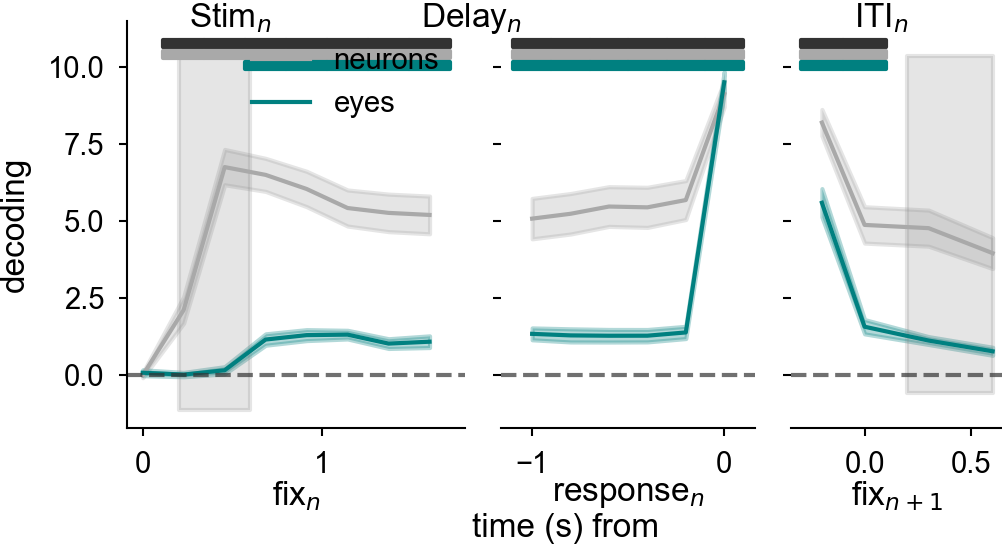

In [25]:
with open('./Results/Figure3/SameTimeDecoder_200ms.pickle', 'rb') as handle:
    df_sametime = pickle.load(handle)

with open('./Results/Figure3/SaccadeDecoder_200ms.pickle', 'rb') as handle:
    df_sacc = pickle.load(handle)
bins = 200/1000

df_sametime['session_continuous'] = df_sametime.monkey + df_sametime.session.astype(str)
df_sacc['session_continuous'] = df_sacc.monkey + df_sacc.session.astype(str)

# remove Pe2 (shorter stimulus)
df_sametime = df_sametime.loc[df_sametime.session_continuous != 'Pe2'].reset_index(drop=True)
df_sacc = df_sacc.loc[df_sacc.session_continuous != 'Pe2'].reset_index(drop=True)

#delay decoder average
borders = np.array([np.array(df_sametime.borders_full[i]) for i in df_sametime.index])
acc_sametime,borders_mean_sametime = cut_task_timings(df_sametime.msacc_basecorrected_prev_combined, borders, 15)


# saccade decoder average
borders_sacc = np.array([np.array(df_sacc.borders_full[i]) for i in df_sacc.index])
acc_sacc,borders_mean_sacc = cut_task_timings(df_sacc.msacc_basecorrected_prev_combined, borders_sacc, 15)


# PLOT
plot_twolines_full(R=acc_sametime, base= acc_sacc, bins=bins,\
                      labelR='neurons',labelB='eyes', errorbars='SEM',shorten_delay=2, significances=True,\
                             borders=borders_mean_sacc, ylabel='decoding', colors=['darkgrey', 'teal'])

plt.tight_layout()
#plt.savefig('/Figures/Supplement/CompareSameTimeVSSaccadeDecoder_all'+'.svg')

### Correlate gaze and behavioral error

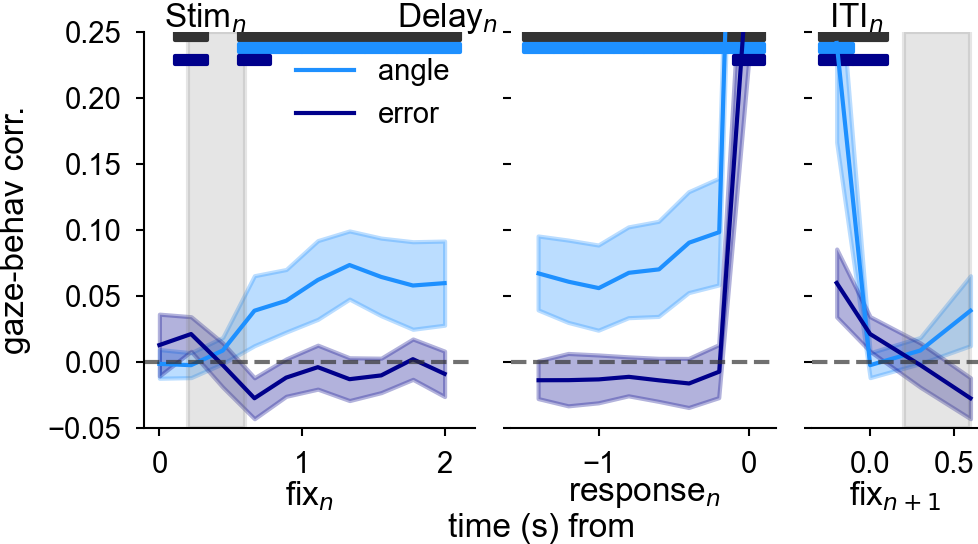

In [26]:
with open('./Results/Figure3/CorrelateEyeMovementsResponse_bins200.pickle', 'rb') as handle:
    df_gazeBehav = pickle.load(handle)
bins=200/1000

df_gazeBehav['session_continuous'] = df_gazeBehav.monkey + df_gazeBehav.session.astype(str)
df_gazeBehav = df_gazeBehav.loc[df_gazeBehav.session_continuous != 'Pe2'].reset_index(drop=True)


borders = np.array([df_gazeBehav.borders_full[i] for i in df_gazeBehav.index])

corr, borders_mean = cut_task_timings(df_gazeBehav['corr'].values, borders, 15)
corrErr, borders_mean = cut_task_timings(df_gazeBehav['corrErr'].values, borders, 15)

plot_twolines_full(R=corr, base=corrErr, bins=bins,\
                      labelR='angle',labelB='error', ylim=[-0.05, 0.25], errorbars='CI',significances=True,\
                             borders=borders_mean, ylabel='gaze-behav corr.', colors=['dodgerblue', 'darkblue'],
                  end_border=15)
plt.tight_layout()
#plt.savefig('./Figures/Supplement/CorrelateEyeMovementsResponse.svg')

### Supplement: Hemispheric correlations when removing eye-regressor

In [27]:
with open('./Results/Figure3/DelayDecoderCorrelations_EyeTracker_bins200_all.pickle', 'rb') as handle:
    df_correlate = pickle.load(handle)

In [28]:
chosen_pred = 'prediction_reduced_'#

    
df_correlate['session_continuous'] = df_correlate['monkey']+df_correlate['session'].astype(str)
df_correlate.drop(index=np.where((df_correlate.session_continuous=='Pe2'))[0], inplace=True)
df_correlate.reset_index(drop=True, inplace=True)

bins=200/1000
    
# AVERAGE OUT CROSSVALIDATIONS
meancrossval = {chosen_pred+'left1':[], chosen_pred+'left2':[], chosen_pred+'right1':[], chosen_pred+'right2':[],\
                'real':[], 'borders_full':[], 'monkey':[], 'session':[], 'session_continuous':[]}
for m in np.unique(df_correlate.monkey):
    for s in np.unique(df_correlate.loc[(df_correlate.monkey==m)].session):
        df_mono = df_correlate.loc[(df_correlate.monkey==m) & (df_correlate.session==s)]
        for hemi in ['left1', 'left2', 'right1', 'right2']:
            meancrossval[chosen_pred+hemi].append(np.mean([np.array(df_mono[chosen_pred+hemi][i])\
                                                             for i in df_mono.index], axis=0))
        meancrossval['real'].append(np.mean([np.array(df_mono.real[i]) for i in df_mono.index], axis=0))
        meancrossval['borders_full'].append(df_mono.borders_full.values[0][0])
        meancrossval['session_continuous'].append(df_mono.session_continuous.values[0])
        meancrossval['monkey'].append(m)
        meancrossval['session'].append(s)
        
        
df_meancorrelate = pd.DataFrame(meancrossval)


# compute real part, complex part, prediction angle / strength /error
subhemis = ['left1', 'left2', 'right1', 'right2']

for hemi in subhemis:
    df_correlate[chosen_pred+hemi] = [np.array(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['real_predict_'+hemi] = [np.real(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['imag_predict_'+hemi] = [np.imag(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['angle_predict_'+hemi] = [np.angle(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['strength_predict_'+hemi] = [np.abs(df_correlate[chosen_pred+hemi][c]) for c in df_correlate.index]
    df_correlate['error_predict_'+hemi] = [np.array([circdist(np.angle(df_correlate[chosen_pred+hemi][c][t]),\
                                                           np.angle(df_correlate['real'][c][t]))\
                                                  for t in range(len(df_correlate['real'][c]))])\
                                                 for c in df_correlate.index]

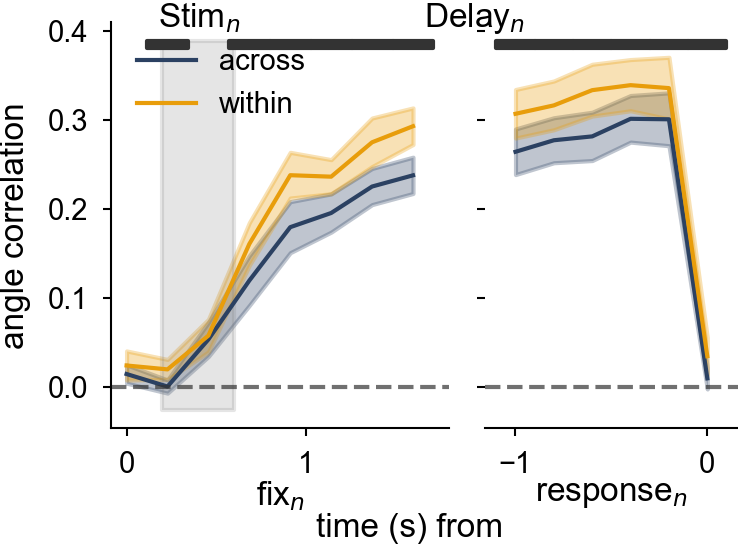

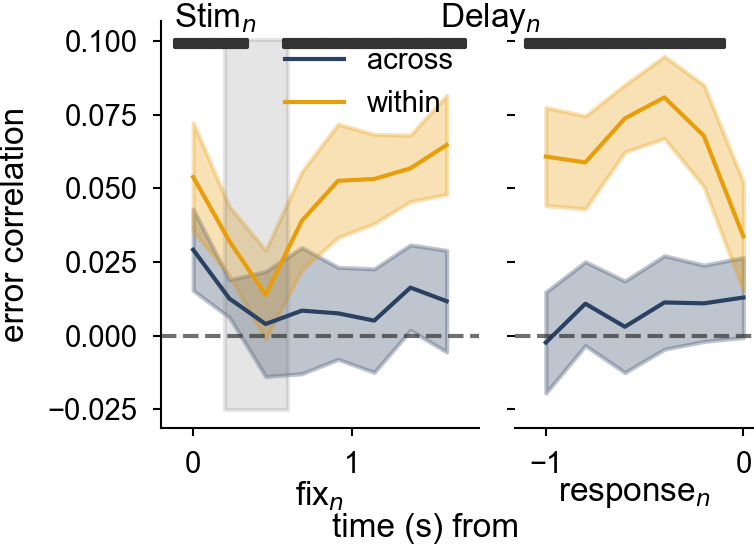

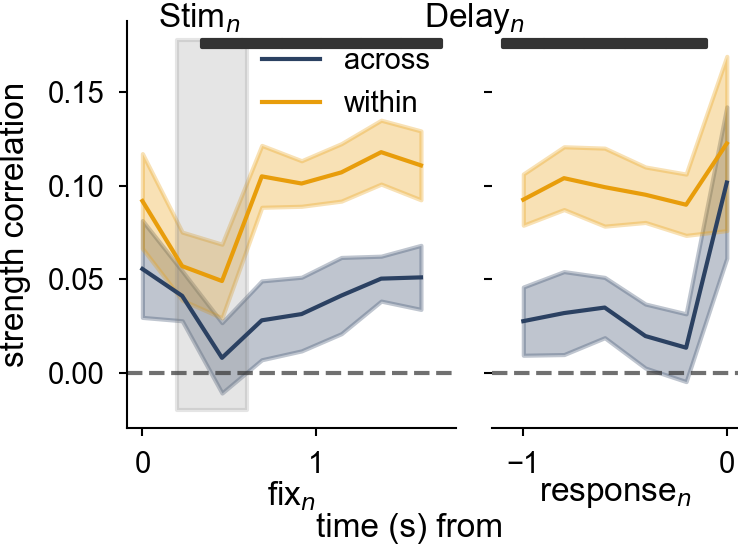

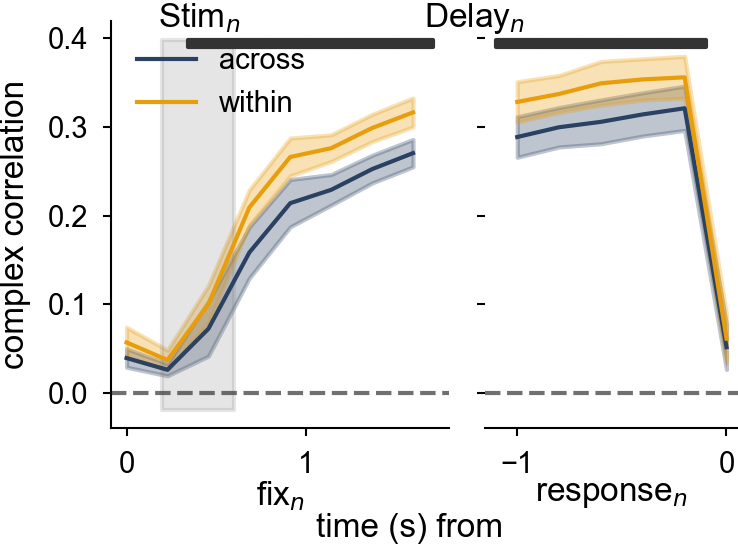

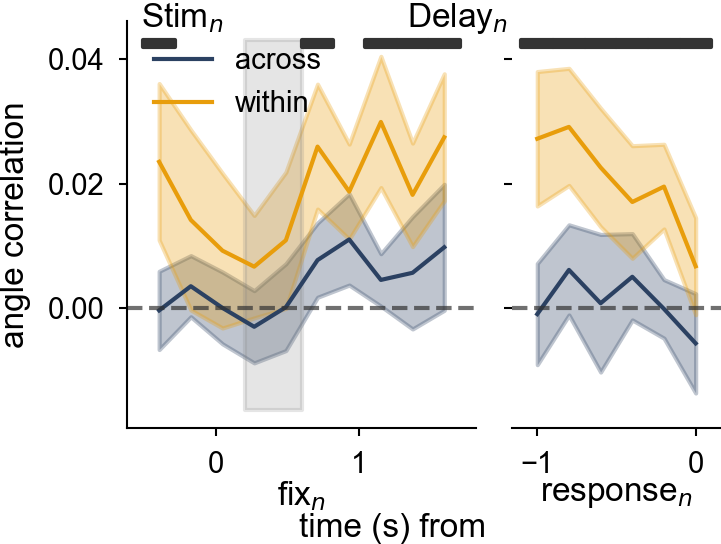

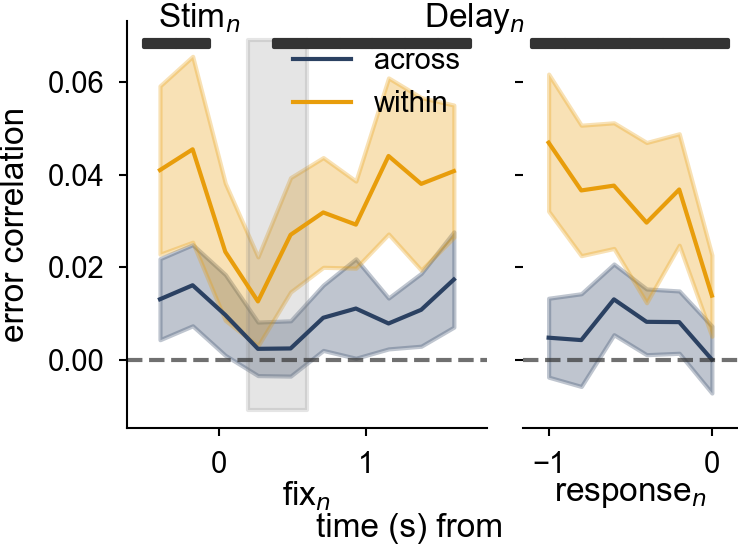

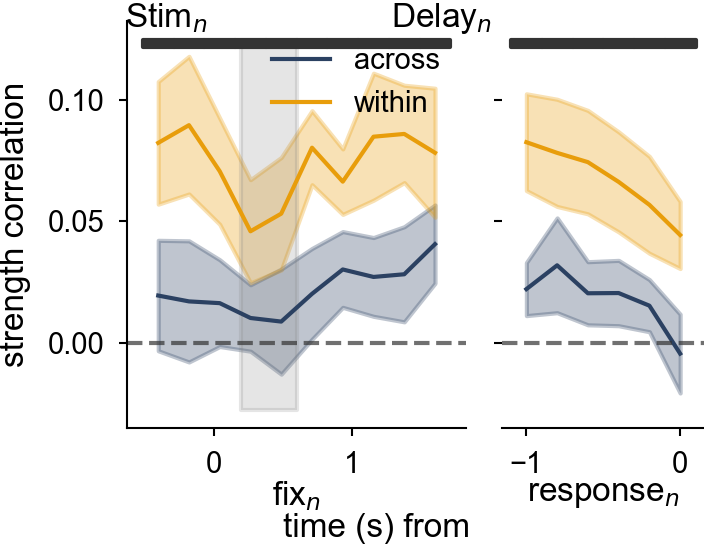

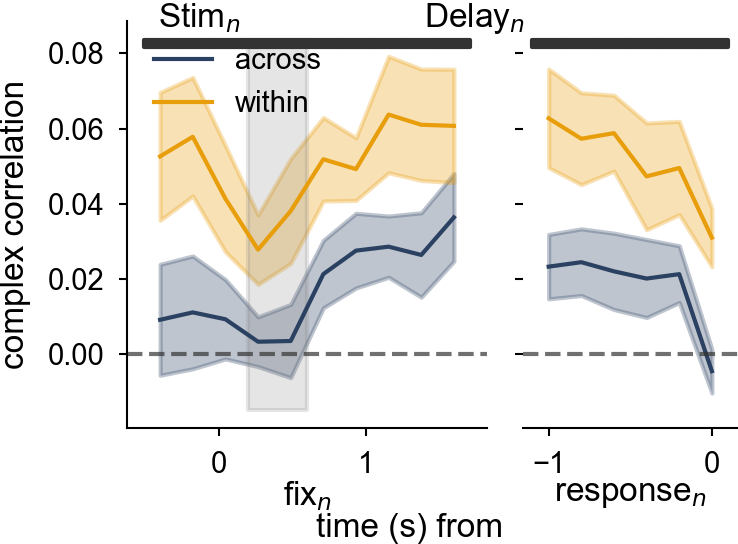

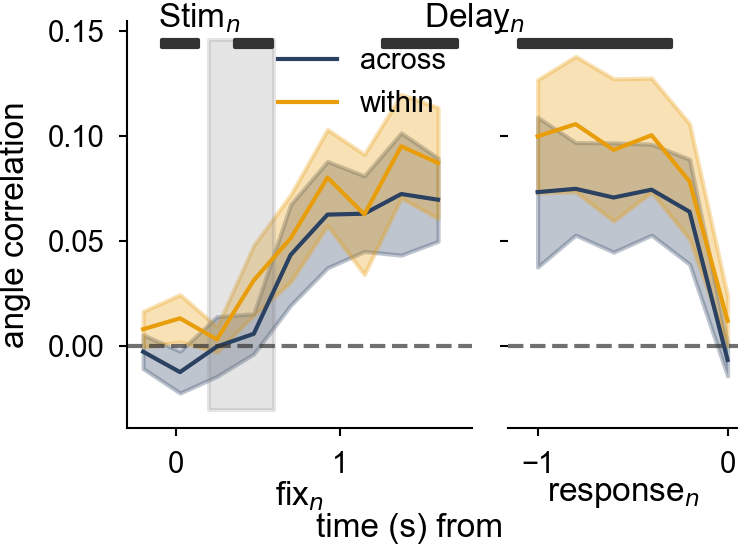

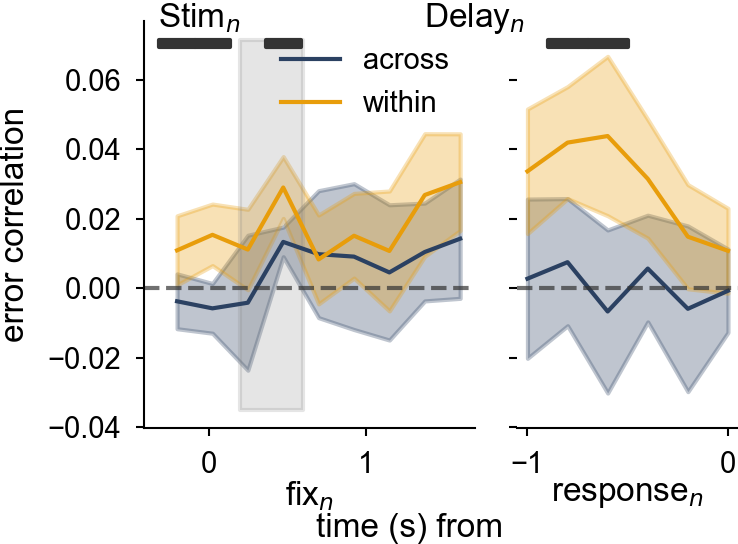

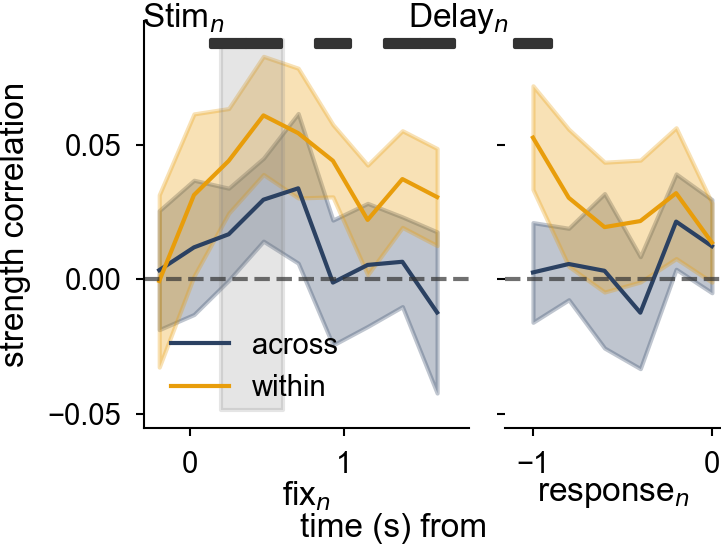

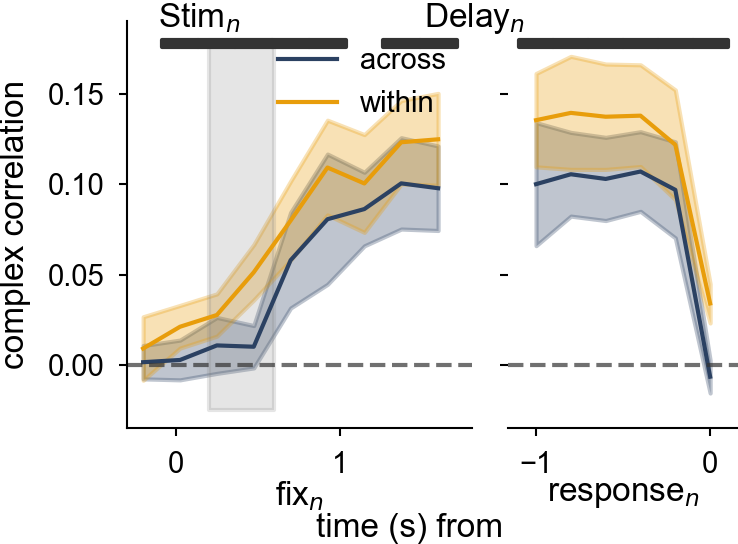

In [29]:
angle = {m: {f:[] for f in subhemis} for m in monkeys}\


import copy
borders = []
corr_variables = ['angle', 'error', 'strength', 'complex']
corr_across_all = {i: [] for i in corr_variables}
corr_within_all = {i: [] for i in corr_variables}
for monkey in ['Sa', 'Pe', 'Wa']:#monkeys:
    corr_across = {i: [] for i in corr_variables}
    corr_within = {i: [] for i in corr_variables}
    borders_mono=[]
    for s,session in enumerate(np.unique(df_correlate.loc[df_correlate.monkey==monkey]['session'])):
        df_sess = df_correlate.loc[(df_correlate.monkey==monkey) & (df_correlate.session==session)].reset_index()
        borders_mono.append(df_sess.borders_full[0][0])
        borders.append(df_sess.borders_full[0][0])
        
        # COMPLEX CORRELATIONS:
        
        # complex similarity: a*b*cos(theta-gamma)
        across=[]
        within=[]
        for idx,part in enumerate(['left', 'right']):
            # mean across trials, crossval of: a*b*cos(alpha-beta)*2/sqrt(a^2+b^2)
            across.append(np.mean(np.mean([2*(df_sess.loc[crossval, 'strength_predict_left'+str(idx+1)]*\
                                    df_sess.loc[crossval,'strength_predict_right'+str(idx+1)]*\
                                    np.cos(df_sess.loc[crossval, 'angle_predict_left'+str(idx+1)]-\
                                    df_sess.loc[crossval, 'angle_predict_right'+str(idx+1)]))/\
                                    (df_sess.loc[crossval, 'strength_predict_left'+str(idx+1)]**2+\
                                    df_sess.loc[crossval, 'strength_predict_right'+str(idx+1)]**2)\
                                           for crossval in df_sess.index], axis=1), axis=0))
            within.append(np.mean(np.mean([2*(df_sess.loc[crossval, 'strength_predict_'+part+'1']*\
                                    df_sess.loc[crossval, 'strength_predict_'+part+'2']*\
                                    np.cos(df_sess.loc[crossval, 'angle_predict_'+part+'1']-\
                                    df_sess.loc[crossval, 'angle_predict_'+part+'2']))/\
                                    (df_sess.loc[crossval, 'strength_predict_'+part+'1']**2+\
                                    df_sess.loc[crossval, 'strength_predict_'+part+'2']**2)\
                                           for crossval in df_sess.index], axis=1), axis=0))
        # combine two parts (within11, within22; acrossLR, acrossRL)
        corr_across['complex'].append(np.mean(across, axis=0))
        corr_across_all['complex'].append(np.mean(across, axis=0))
        corr_within['complex'].append(np.mean(within, axis=0))
        corr_within_all['complex'].append(np.mean(within, axis=0))
        # save across sessions per monkey

        # CIRCULAR CORRELATIONS:

        # only circular correlation in angle space
        for var in ['angle', 'error']:

            part1 = np.mean([[circ_corrcc(df_sess.loc[crossval, var+'_predict_left1'][:,t],\
                                       df_sess.loc[crossval, var+'_predict_right1'][:,t], correction_uniform=True)[0]\
                          for t in range(len(df_sess.loc[crossval, var+'_predict_left1'][0]))]\
                          for crossval in range(len(df_sess.index))], axis=0)
            part2 = np.mean([[circ_corrcc(df_sess.loc[crossval, var+'_predict_left2'][:,t],\
                                       df_sess.loc[crossval, var+'_predict_right2'][:,t], correction_uniform=True)[0]\
                              for t in range(len(df_sess.loc[crossval, var+'_predict_left2'][0]))]\
                              for crossval in range(len(df_sess.index))], axis=0)

            # mean across two halves
            corr_across[var].append(np.mean([part1, part2], axis=0))
            corr_across_all[var].append(np.mean([part1, part2], axis=0))

            # within hemispheres
            part1 = np.mean([[circ_corrcc(df_sess.loc[crossval, var+'_predict_left1'][:,t],\
                                          df_sess.loc[crossval, var+'_predict_left2'][:,t], correction_uniform=True)[0]\
                              for t in range(len(df_sess.loc[crossval, var+'_predict_left1'][0]))]\
                              for crossval in range(len(df_sess.index))], axis=0)
            part2 = np.mean([[circ_corrcc(df_sess.loc[crossval, var+'_predict_right1'][:,t],\
                                          df_sess.loc[crossval, var+'_predict_right2'][:,t], correction_uniform=True)[0]\
                              for t in range(len(df_sess.loc[crossval, var+'_predict_right1'][0]))]\
                              for crossval in range(len(df_sess.index))], axis=0)
            corr_within[var].append(np.mean([part1, part2], axis=0))
            corr_within_all[var].append(np.mean([part1, part2], axis=0))

        # STRENGTH CORRELATIONS: ALONG STIMULUS DIMENSION (for comparing react, delay)
            
        # when not angles, use pearon correlation (non-circular)
        var='strength'
        # get strength of projection onto stimulus dimension (complex prediction * complex conjugate of stimulus)
        #cc_stimulus = np.conjugate(df_sess.real[0]) # stimulus is the same across crossvals
        cc_stimulus = np.cos(np.angle(df_sess.real[0])) - 1j*np.sin(np.angle(df_sess.real[0]))
        
        # for within / across hemispheres correlate the strength of the decoder along the stimulus location
        part = {i:[] for i in [1,2]}
        for p in [1,2]:
            # get real part (strength) of prediction*cc(stimulus) (projection onto stim dimension)
            part[p] = np.mean([[pearsonr(np.real(df_sess.loc[crossval, chosen_pred+'left'+str(p)][:,t]*cc_stimulus),\
                               np.real(df_sess.loc[crossval, chosen_pred+'right'+str(p)][:,t]*cc_stimulus))[0]\
                      for t in range(len(df_sess.loc[crossval, chosen_pred+'left1'][0]))]\
                      for crossval in range(len(df_sess.index))], axis=0)

        # mean across two halves
        corr_across[var].append(np.mean([part[1], part[2]], axis=0))
        corr_across_all[var].append(np.mean([part[1], part[2]], axis=0))

        # within hemispheres
        part1 = np.mean([[pearsonr(np.real(df_sess.loc[crossval, chosen_pred+'left1'][:,t]*cc_stimulus),\
                               np.real(df_sess.loc[crossval, chosen_pred+'left2'][:,t]*cc_stimulus))[0]\
                      for t in range(len(df_sess.loc[crossval, chosen_pred+'left1'][0]))]\
                      for crossval in range(len(df_sess.index))], axis=0)
        part2 = np.mean([[pearsonr(np.real(df_sess.loc[crossval, chosen_pred+'right1'][:,t]*cc_stimulus),\
                               np.real(df_sess.loc[crossval, chosen_pred+'right2'][:,t]*cc_stimulus))[0]\
                      for t in range(len(df_sess.loc[crossval, chosen_pred+'right1'][0]))]\
                      for crossval in range(len(df_sess.index))], axis=0)
        corr_within[var].append(np.mean([part1, part2], axis=0))
        corr_within_all[var].append(np.mean([part1, part2], axis=0))

    # average out crossvalidations
    #z_scored_mono = [np.mean(z_scored_mono[sess], axis=0) for sess in range(len(z_scored_mono))]
    corr_variables = ['angle', 'error', 'strength', 'complex']
    Corr_mono_within = {i: [] for i in corr_variables}
    Corr_mono_across = {i: [] for i in corr_variables}
    for var in corr_variables:
        # cut all sessions to same length
        
        Corr_mono_within[var],borders_mean = cut_task_timings(corr_within[var], borders_mono, 15)
        Corr_mono_across[var],borders_mean = cut_task_timings(corr_across[var], borders_mono, 15)

        plot_twolines_full(R=Corr_mono_across[var],base=Corr_mono_within[var], bins=bins,\
                          labelR='across',labelB='within', errorbars='CI',shorten_delay =2, end_border=9,\
                                 borders=borders_mean, ylabel=var+' correlation')
        plt.tight_layout()

#### monkey average (eye-reduced)

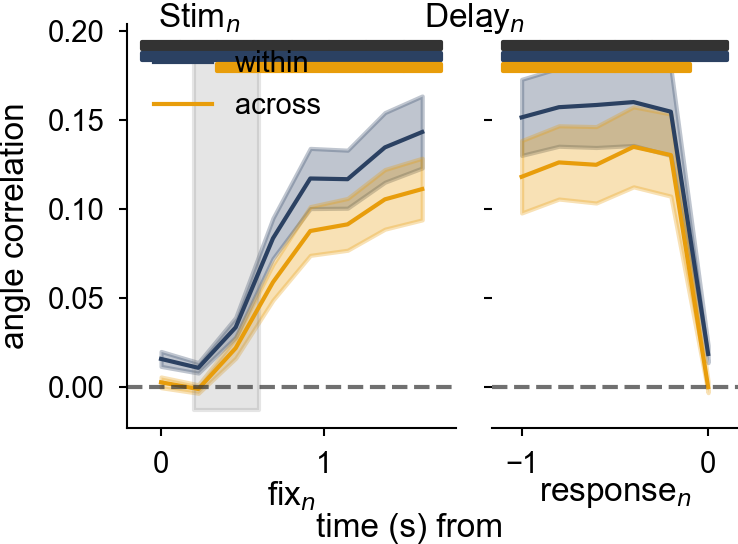

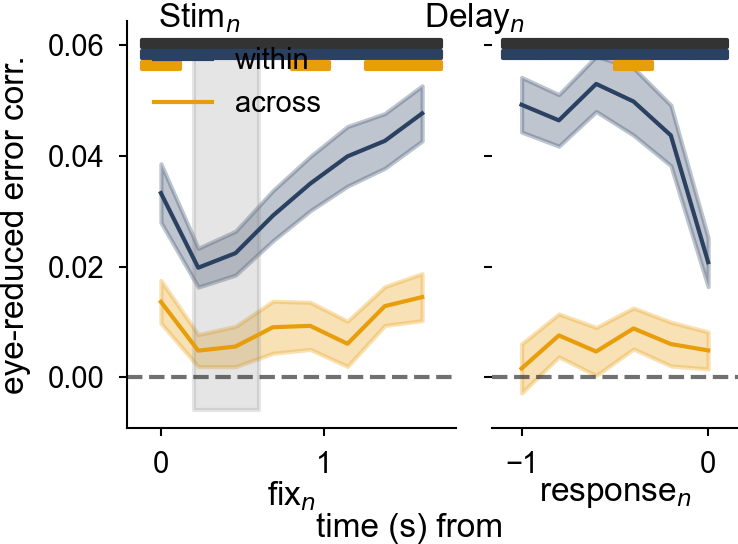

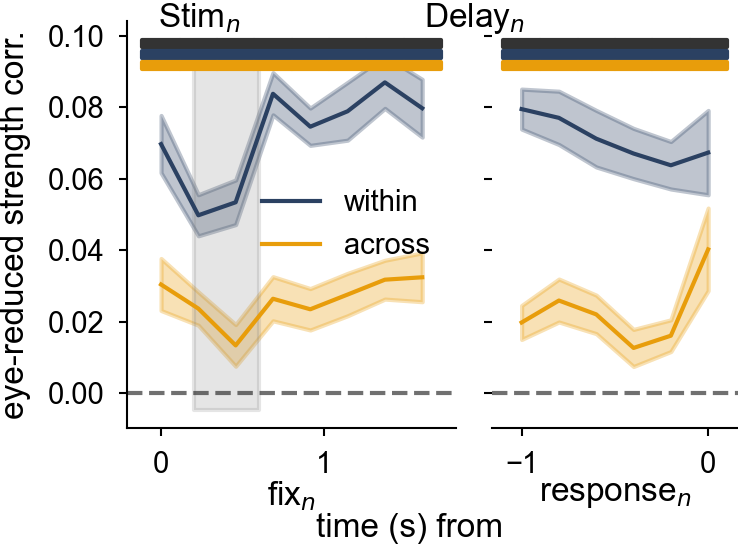

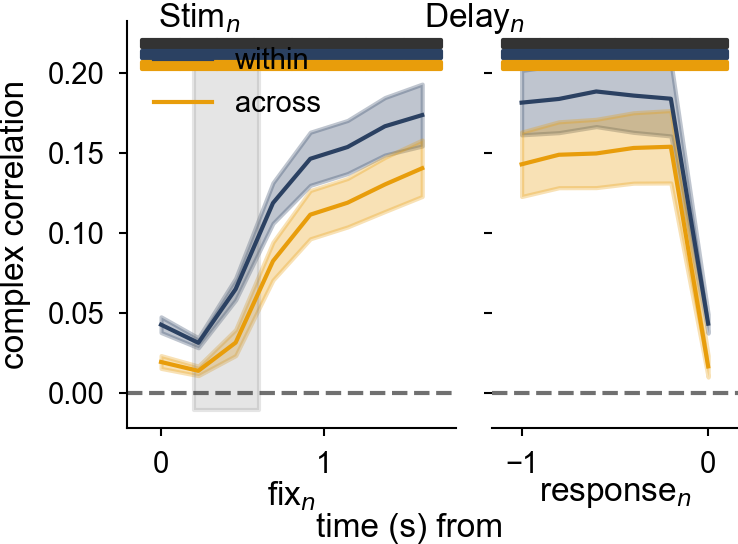

In [33]:
# cut all sessions to same length
corr_variables = ['angle', 'error', 'strength', 'complex']
Corr_within_ipsi_all = {i: [] for i in corr_variables}
Corr_within_contra_all = {i: [] for i in corr_variables}
for var in corr_variables:
    # cut all sessions to same length
    corr_within,borders_mean = cut_task_timings(corr_within_all[var], borders, 15)
    corr_across,borders_mean = cut_task_timings(corr_across_all[var], borders, 15)
    
    if (var!='error') & (var!='strength'):
        plot_twolines_full(R=corr_within,base=corr_across, bins=bins,\
                          labelR='within',labelB='across', errorbars='SEM',shorten_delay =2,\
                                 borders=borders_mean, ylabel=var+' correlation', end_border=9, significances=True)
    else:
        plot_twolines_full(R=corr_within,base=corr_across, bins=bins,\
                          labelR='within',labelB='across', errorbars='SEM',shorten_delay =2,\
                           end_border=9,\
                                 borders=borders_mean, ylabel='eye-reduced '+var+' corr.', significances=True)
    plt.ylim(auto=True)
    plt.tight_layout()
    #plt.savefig('./Figures/Supplement/EyeReduced_'+var+'Correlations200ms_all'+'.svg')
    plt.show()

#### error stats

Within: Ttest_1sampResult(statistic=11.745296642374267, pvalue=3.254464803399309e-14)
Across: Ttest_1sampResult(statistic=4.2089293248554185, pvalue=0.00015119288414635883)
Within-Across: Ttest_relResult(statistic=9.18299880633898, pvalue=3.452492621191381e-11)


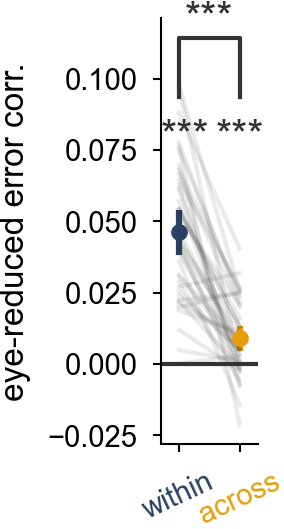

In [35]:
delay_avg_within = np.mean([corr_within_all['error'][i][borders_mean[5]:borders_mean[6]]\
                           for i in range(len(corr_within_all['error']))], axis=1)
delay_avg_across = np.mean([corr_across_all['error'][i][borders_mean[5]:borders_mean[6]]\
                           for i in range(len(corr_within_all['error']))], axis=1)

f, ax = plt.subplots(figsize=(1.1,2))
ax.axhline(color='#333333')
ax.plot([np.zeros((len(delay_avg_within))), np.ones((len(delay_avg_across)))],\
        [delay_avg_within, delay_avg_across], color='#333333', alpha=0.1)
#ax.scatter(np.zeros((len(delay_avg_within))), delay_avg_within, color='darkgreen', alpha=0.1)
ax.errorbar(0, np.mean(delay_avg_within), yerr=2*sem(delay_avg_within), color=colors['Within'], marker='o', elinewidth=1.5)
#ax.scatter(np.ones((len(delay_avg_across))), delay_avg_across, color='darkorange', alpha=0.1)
ax.errorbar(1, np.mean(delay_avg_across), yerr=2*sem(delay_avg_across), color=colors['Across'], marker='o', elinewidth=1.5)
y0, y1 = ax.get_ylim()

# figure out stats
stats_w = ['***' if ttest_1samp(delay_avg_within, 0)[1] < 0.005\
           else '**' if ttest_1samp(delay_avg_within, 0)[1] < 0.01\
            else '*' if ttest_1samp(delay_avg_within, 0)[1] < 0.05 else 'n.s.'][0]
stats_a = ['***' if ttest_1samp(delay_avg_across, 0)[1] < 0.005\
           else '**' if ttest_1samp(delay_avg_across, 0)[1] < 0.01\
            else '*' if ttest_1samp(delay_avg_across, 0)[1] < 0.05 else 'n.s.'][0]
stats_diff = ['***' if ttest_rel(delay_avg_within, delay_avg_across)[1] < 0.005\
           else '**' if ttest_rel(delay_avg_within, delay_avg_across)[1] < 0.01\
            else '*' if ttest_rel(delay_avg_within, delay_avg_across)[1] < 0.05 else 'n.s.'][0]

y0, y1 = ax.get_ylim()
ax.annotate(stats_w,(0.1, y1-3*y1/10), ha='center', va='bottom', fontsize=10, color='#333333')
ax.annotate(stats_a,(1, y1-3*y1/10), ha='center', va='bottom', fontsize=10, color='#333333')
ax.plot([0,0,1,1],\
        [y1-1*y1/10,y1+y1/10, y1+y1/10, y1-1*y1/10], linewidth=1, color='#333333')
ax.annotate(stats_diff,\
           (0.5, y1+y1/10), ha='center', va='bottom', fontsize=10, color='#333333')

ax.set_ylabel('eye-reduced error corr.')
ax.set_xticks([0,1])
ax.set_xticklabels(['within', 'across'], rotation = 25)
ax.set_xlim([-0.3, 1.3])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
xticks = plt.gca().get_xticklabels()
xticks[0].set_color(colors['Within'])
xticks[1].set_color(colors['Across'])
sns.despine()
plt.tight_layout()
#plt.savefig('./Figures/Supplement/EyeRemovedDelayAvgErrorCorrelations200ms_all'+'.svg')

print('Within: '+str(ttest_1samp(delay_avg_within, 0)))
print('Across: '+str(ttest_1samp(delay_avg_across, 0)))
print('Within-Across: '+str(ttest_rel(delay_avg_within, delay_avg_across)))